# What sells a car?

I stepped into a role of an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on our site every day. One of the task was to study data collected over the last year and determine which factors influence the price of a vehicle.

## Content <a id='content'></a>

[Introduction](#intro)

[Dataset](#dataset)

[Data overview](#data_overview)

[Data preprocessing](#preprocessing)

[EDA](#eda)

[Testing hypotheses](#testing)

[Summary and conclusions](#conclusions)

## Introduction <a id='intro'></a>

The ultimate goal stated for the project is to determine which factors influence the price of a vehicle; thus, we are going to reveal sound assumptions with regard to cars' characteristics which have the most impact the price of a particular vehicle.

We have not been provided with any preliminary hypothesis or information regarding the data quality; therefore, we will have to carefully study the data, evaluate its quality and see how significant its issues are and what are appropriate ways to fix them. It will be safe to assume that the project will involve some data preprocessing: we account for the most critical problems (identify and fill in missing values, cast data types according to the needs of the project, delete duplicate data and categorize the data). Next stage will be EDA: we will take care, as much as it will be possible, to check and compensate for issues that might arise, besides of data being incomplete or duplicated: such as mistakes in the recording values and major artifacts which can find their way into the data and  will require additional thought to enable further hypotheses testing. The next stage is to come up with and test hypotheses with regard to the features influencing the car prices. The last stage is making an overview of the findings and writing recommendations on the development of the car pricing model to be. Thus, the project will consist of four stages:

 1. Data overview;
 2. Data preprocessing/transformation;
 3. EDA;
 4. Testing the hypotheses;
 5. Sumary and conclusion.

[Back to Content](#content)

## Dataset <a id='dataset'> <a/>

We were provided with data on vehicle sales; the dataset was said to contain the following 12 fields:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

[Back to Content](#content)

## 1. Data overview <a id = 'data_overview'> <a/>

### Load libraries

We start with importing the necessary libraries and loading the data. If additional libraries are needed, we will add them to the next cell also and update it.

In [1]:
# Loading the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # We will need this for visualisations
%matplotlib inline
import seaborn as sns
from scipy import stats # We will need this in case we want to make some statistical checks

# To filter out automatic comments on plots from Jupyter (not affecting the output)
import warnings
warnings.filterwarnings("ignore") 

### Load initial data

Let's read the data. We wrap the file reading request into a try-except block to make sure that the project runs both locally and on the platform and check that the data set was uploaded.

In [2]:
# Load the data file into a DataFrame

try:
    cars_raw = pd.read_csv('datasets/vehicles_us.csv')
except:
    cars_raw = pd.read_csv('/datasets/vehicles_us.csv')

# checking that the file was read

cars_raw.head(1)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19


Note: we see that there is additional variable called `type`, so we have 13 instead of 12 variables.

[Back to Content](#content)

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `type`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

Let's see how many rows and columns the dataset has.

In [3]:
# print the general/summary information about the DataFrame
raw_shape = cars_raw.shape
print(f'DataFrame length: {raw_shape[0]}; DataFrame width: {raw_shape[1]}')


DataFrame length: 51525; DataFrame width: 13


In [4]:
# check for duplicated rows
cars_raw.duplicated().sum()

0

The initial dataset has information about unique 51525 vehicle sale postings. The data does not seem to have issues with column names, but let's make additional check on column names.

In [5]:
cars_raw.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

Right, column names are OK: snake_case and lowercase are used, no spaces.

We already know, that we deal with 51525 vehicle sale postings. Let's check what time period does our data cover and what is the range of model years.

In [6]:
print(cars_raw['date_posted'].min(), cars_raw['date_posted'].max())

2018-05-01 2019-04-19


In [7]:
print(cars_raw['model_year'].min(), cars_raw['model_year'].max())

1908.0 2019.0


The data span a period of 354 days, from May 1, 2018 up to April 19, 2019. Different cars are sold on Crankshaft List platform, including as old as one hundred year old.

Let's see what is the average number of posting per day and the number of vehicle models covered by the dataset, as well as number of ads per vehicle type.

In [8]:
car_postings_per_day = len(cars_raw) / 354 # number of postings per day
print('Number of postings per day:', car_postings_per_day)

Number of postings per day: 145.55084745762713


In [9]:
# distribution of vehicle models
car_models = cars_raw.pivot_table(index = ['model'], values = ['price'], aggfunc = ['median', 'count'])

In [10]:
# number of unique models
car_models.index.to_series().count()

100

In [11]:
# distribution of types
car_types = cars_raw['type'].value_counts()
car_types

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

In [12]:
car_models.head(10)

,median,count
,price,price
model,,
acura tl,5900.0,236
bmw x5,9775.0,267
buick enclave,9995.0,271
cadillac escalade,13995.0,322
chevrolet camaro,11961.0,414
chevrolet camaro lt coupe 2d,19700.0,311
chevrolet colorado,12491.0,286
chevrolet corvette,16000.0,499


There seem to be roughly 145 postings per day on Crankshaft List platform on 100 unique vehicle models. The TOP5 vehicle types are `SUV`, `truck`, `sedan`, `pickup`, and `coupe`.

 Let's print out the first 15 rows and try to see what kind of missing valueas we are dealing with.

In [13]:
# print a sample of data
cars_raw.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


We can see, that there are some missing values in variables like `model_year` and `cylinders`, and even more missing values in `paint_color` and `is_4wd`. Let's check the overall dataset:

In [14]:
cars_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Indeed, there is some share of missing values in `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd`; for the last varable appr. 50% of data is missing, thuough it looks like the NaN values just stand for zero (no 4wd), so that it shoul not be a problem to fill it in. In addition, there are issues with data types; e.g., model_year can be expected to be integer, while it is float, date_posted is string, `is_4wd` is float instead of being boolean, we will fix them soon. Let's see the exact shares of missing variables.

In [15]:
cars_raw.isna().sum()/len(cars_raw)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

From the start to the end of the list of variables with missing values the things are getting worse; looks like we will have to take care of them. 8 out of 13 variables do not have missing values at all, including the dependent variable `price`.

[Back to Content](#content)

### Conclusions and further steps

To sum up, the initial dataset includes 51525 vehicle sale postings over 354 days starting from May 1, 2018 to April 19, 2019, which makes approximately 145 postings a day on 100 vehicle models when the five most popular vehicle types are SUV, truck, sedan, pickup, and coupe. The following, pretty regular, issues should be taken care of from the very beginning with regard to the initial data to make it more suitable for the required analysis:
- Missing values in `model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd`;
- Wrong types of `model_year`, `cylinders`, `is_4wd`, and `date_posted`.

The next stage, Data Preprocessing, will treat this issues and we will orginize the work in the following order:
- fix the type of `date_posted`;
- fix the data types of `model_year` and `cylinders`;
- fix categorical variable type for `condition`, `fuel`, `transmission`, and `type`;
- fill in the missing values in `is_4wd` with nulls and fix the data type;
- fill in the missing values in `paint_color` with 'unknown' (at least, as the first approximation);
- check whether and how we can fill in the missing values in `model_year`, `cylinders`, `odometer`;
- finally, we will enrich our data by adding variables which we may find useful further down the road.

[Back to Content](#content)

## 2. Data Preprocessing <a id="preprocessing"> <a/>

### `date_posted` type <a id = "dp_type"> <a/>

`date_posted` has `%Y-%m-%d` format; therefore, we will apply to_datetime() method using this format to cast it into correct datetime.

In [16]:
cars_raw['date_posted']=pd.to_datetime(cars_raw['date_posted'], format = '%Y-%m-%d')
cars_raw.head(1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19


<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
 
 Great that you converted  the`date_posted` column in `datetime` format</div>    

[Back to Content](#content)

### `cylinders` and `model_year` type <a id = "cmy_type"> <a/>

Given we have NaN values in these two columns, we need to  use 'Int64' type to cast them into integer type.

In [17]:
cars_raw['cylinders'] = cars_raw['cylinders'].astype('Int8')

In [18]:
cars_raw['model_year'] = cars_raw['model_year'].astype('Int16')

In [19]:
cars_raw.head(1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19


### categorical variables type for `condition`, `fuel`, `transmission`, and `type`

In [20]:
cat_lst = ['condition', 'fuel', 'transmission', 'type']

for cat_var in cat_lst:
    cars_raw[cat_var] = cars_raw[cat_var].astype('category')

In [21]:
cars_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  Int16         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  category      
 4   cylinders     46265 non-null  Int8          
 5   fuel          51525 non-null  category      
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  category      
 8   type          51525 non-null  category      
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: Int16(1), Int8(1), category(4), datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 3.2+ MB


[Back to Content](#content)

### Missing values in `is_4wd` <a id = "is_4wd_mv"> <a/>

Let's take a closer look at `is_4wd` variable.

In [22]:
cars_raw['is_4wd'].value_counts(normalize = True, dropna=False)

NaN    0.503697
1.0    0.496303
Name: is_4wd, dtype: float64

Given the variable has only two values, Nan and 1, we will assume that the source of this variable is a checkbox in the car listing form, so that the working hypothesis will be that NaN values can be just substitutet with zero.

Note, at tis step, we will create a new DataFrame `cars` for writing fixed data into it and start with filling in `is_4wd` missing values.

In [23]:
cars = cars_raw.fillna(value = {'is_4wd': 0})

In [24]:
cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,<NA>,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


Now we can cast the `is_4wd` Series into boolean type.

In [25]:
cars['is_4wd'] = cars['is_4wd'].astype(bool)

In [26]:
cars.head(1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19


[Back to Content](#content)

### Missing values in `paint_color` <a id = "color_mv"> <a/>

Let's check the distribution of values in the `paint_color` column:

In [27]:
cars_raw['paint_color'].value_counts(normalize = True, dropna=False)

white     0.194643
NaN       0.179854
black     0.149287
silver    0.121184
grey      0.097758
blue      0.086851
red       0.085803
green     0.027094
brown     0.023736
custom    0.022377
yellow    0.004949
orange    0.004483
purple    0.001980
Name: paint_color, dtype: float64

In [28]:
# the smallest number of ads is for "purple" color
cars_raw['paint_color'].value_counts(dropna=False).min()

102

Now, let's try to check whether the two subsets, the one with `color_paint` value present and another one with `color_paint` NaN, are different in someway. 

First, we will take a look at the distributions of categorical variables: `fuel`, `transmission`, `condition`, `cylinders`, `year`, and `type`. <a id = "color_mv_random" > <a/>

In [29]:
#pick up only rows without colors
cars_color_nan = cars[cars_raw['paint_color'].isna()]

In [30]:
#distribution of colors presented in the raw dataset
car_colors_dist = cars['paint_color'].value_counts(normalize = True)
#pick up only rows which have colors
cars_colored = cars.query('paint_color in @car_colors_dist.index')

In [31]:
"""
`car_categorical_visual()` is a subplot function which returns a matrix of 6 plots, 4 bar and 2 donut,
for 6 predefined categorical variables.

The function takes 1 position paramater:
- df - the dataset (subset) of interest, DataFrame
The predefined list of paramters is ['fuel', 'transmission', 'condition', 'cylinders', 'model_year', 'type'].
Note: the function calculates normilized counts to account for different sizes of the data subsets
"""


def car_categorical_visual(df):
    
    param_list = ['fuel', 'transmission', 'condition', 'cylinders', 'model_year', 'type'] 
    
    cmap = plt.get_cmap("tab10")
    colors1 = cmap([1, 3, 5, 7, 9])
    colors2 = cmap([2, 4, 6, 8, 10])

    fig = plt.figure(figsize = (18,10))
    gs = fig.add_gridspec(2, 4, width_ratios=[2, 1, 2, 1]) 
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.tick_params(labelrotation=30)
    ax1.set_title("Fuel", loc='left', y=0.85, x=0.4)


    ax2 = fig.add_subplot(gs[0, 1])

    ax3 = fig.add_subplot(gs[0, 2])
    ax3.tick_params(labelrotation=30)
    ax3.set_title("Condition", loc='left', y=0.85, x=0.4)

    
    ax4 = fig.add_subplot(gs[0, 3])

    ax5 = fig.add_subplot(gs[1, :2])
    ax5.tick_params(labelrotation=30)
    ax5.set_title("Manufacturing year", loc='left', y=0.85, x=0.4)

    ax6 = fig.add_subplot(gs[1, 2:])
    ax6.tick_params(labelrotation=30)

    
    df_dict = {}
    for param in param_list:
        df_dict[param] = df[param].value_counts(normalize=True)

    s1 = df_dict['fuel']
    ax1.bar(s1.index,s1)

    
    ax2.pie(df_dict['transmission'], radius=1, colors=colors1,
       wedgeprops=dict(width=0.5, edgecolor='w'))
    ax2.legend(df_dict['transmission'].index, title="Transmission", bbox_to_anchor=(0.4, 0.86))

    s3 = df_dict['condition']
    ax3.bar(s3.index,s3)

    ax4.pie(df_dict['cylinders'], radius=1, colors=colors2,
       wedgeprops=dict(width=0.5, edgecolor='w'))
    ax4.legend(df_dict['cylinders'].index, title="Cylinders", bbox_to_anchor=(0.3, 0.79))
                            # ensuring we do not have decimal numbers for an indivisible value

    s5 = df_dict['model_year']
    ax5.bar(s5.index ,s5)
    ax5.set_xlim(1960, 2020) # ensuring we have comparable x axes

    s6 = df_dict['type']
    ax6.bar(s6.index,s6)

    plt.show()


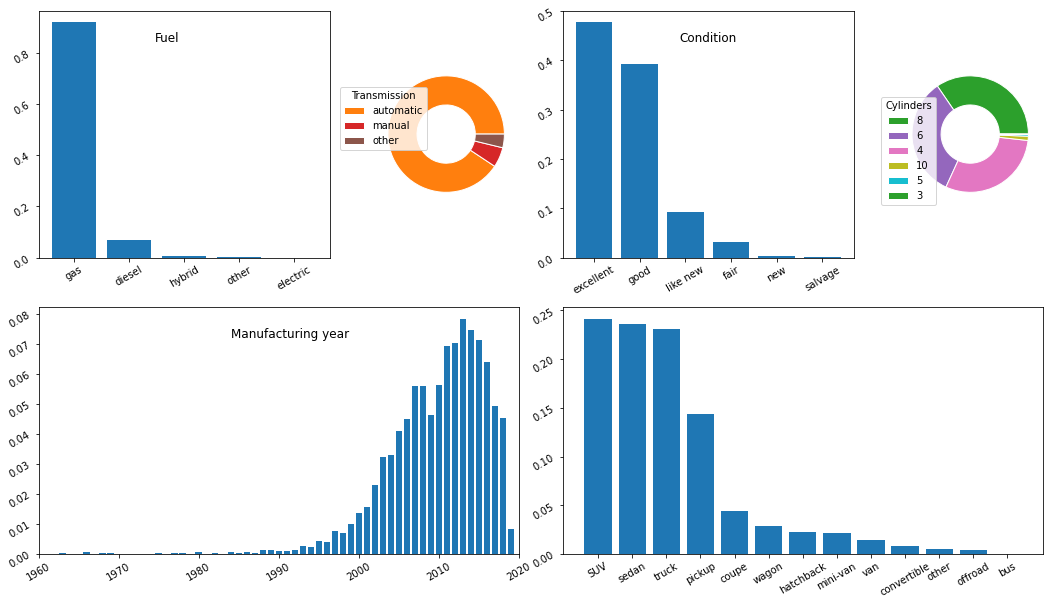

In [32]:
car_categorical_visual(cars_color_nan)

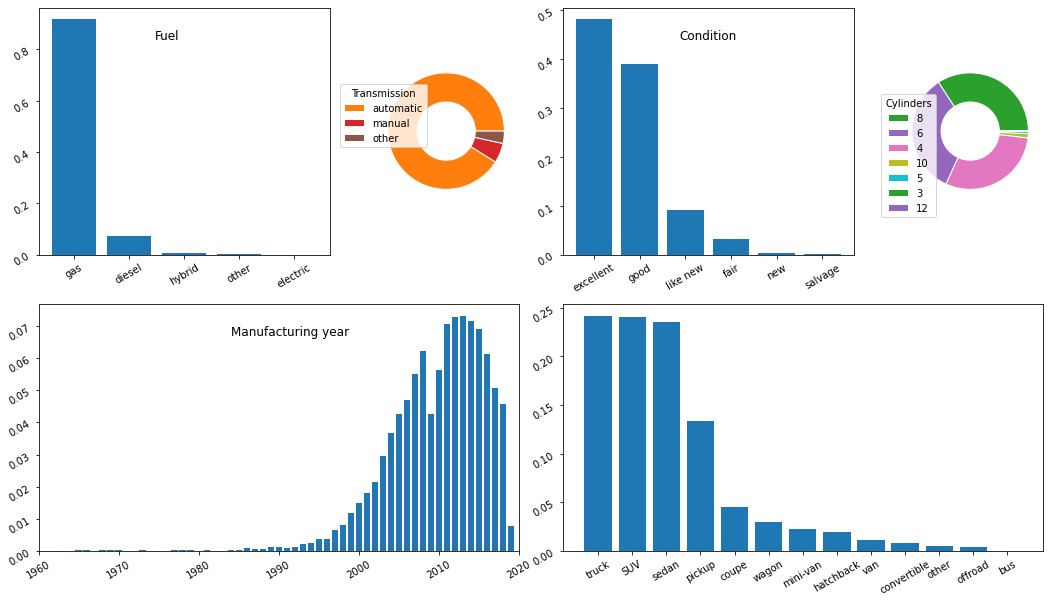

In [33]:
car_categorical_visual(cars_colored)

The distributions of the categorical variables for the two subsets follow the same patterns and the differences are minor; thus, we will consider the lack of color being random with regard to this paramteres. Let's make a quick check with regard to the dynamics of postings with and without color, which presumably has to demonstarte similar patterns of uniform distribution (with some signs of seasonality maybe).

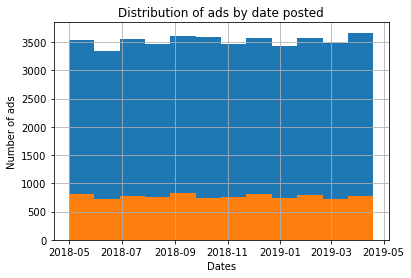

In [34]:
cars_colored['date_posted'].hist(bins = 12)
cars_color_nan['date_posted'].hist(bins = 12)

plt.title('Distribution of ads by date posted')
plt.ylabel('Number of ads')
plt.xlabel('Dates')

plt.show()

Right, it seems that no technical issues occured during the period under consideration which could lead to omitting data on `paint_color` variable.

The last to checks are for the `price` and `odometer` variables:

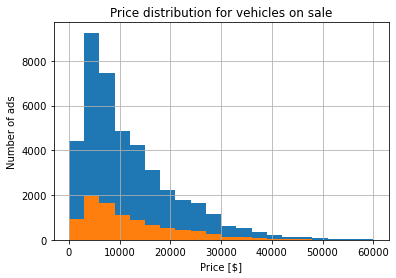

In [35]:
cars_colored['price'].hist(range = (0,60000), bins = 20)
cars_color_nan['price'].hist(range = (0,60000), bins = 20)

plt.title('Price distribution for vehicles on sale')
plt.ylabel('Number of ads')
plt.xlabel('Price [$]')

plt.show()

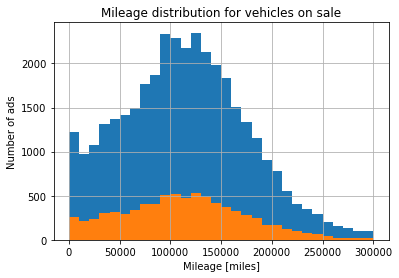

In [36]:
cars_colored['odometer'].hist(range = (0,300000), bins = 30)
cars_color_nan['odometer'].hist(range = (0,300000), bins = 30)

plt.title('Mileage distribution for vehicles on sale')
plt.ylabel('Number of ads')
plt.xlabel('Mileage [miles]')

plt.show()

As in the previous cases, the distributions for the two subsets follow the same patterns, therefore we can conclude that `paint_color` missing variables are missing completely random and fill them in with "unknown" value. Note: we could randomly generate colors based on the existing distribution of colors; however, we do not see an immediate need to do this.

In [37]:
cars = cars.fillna(value = {'paint_color': 'unknown'})
cars.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,<NA>,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,NaN,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19
9,9200,2008,honda pilot,excellent,<NA>,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17


It is worth mentioning, that the last two graphs show considerable number of cases, both for `price` and `odometer`, when the values are close to zero, which we will have to investigate separately. Let's proceed with checking whether and how we can fill in the missing values in `model_year`, `cylinders`, `odometer`.

[Back to Content](#content)

### Restoring missing values in `model_year` <a id = "model_year_mv"> <a/>

Let's make use of the correlation matrix for our dataset, to get the first impression on the dependencies between quantitative variables.

In [38]:
cars.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,0.315145,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,0.043384,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,0.405770,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,0.036267,0.003804
is_4wd,0.315145,0.043384,0.405770,0.036267,1.000000,0.002003
days_listed,-0.000682,-0.005703,0.005517,0.003804,0.002003,1.000000


One can see high absolute correlations between the dependent variable, `price`, and the explanotary variables at our disposale; thus, the correlation matrix illustrate the importance of using as accurate estimates for the missing values as possible. With regard to the `model_year` variable, it seems to have strong correlation with the `odometer` values; therefore, to try to restore the missing values in `model_year`, we will focus on looking for an option to make use of the `odometer` values present. We will calculate the median mileage for each year (for full years) by year cohort and check whether any consistent aggregate average estimate of thy early mileage can be derived to try and fill in the missing values of `model_year` having the current mileage as a proxy.

In [39]:
year_mileage_stat = cars.pivot_table(index = 'model_year', values = ['odometer'], aggfunc = ['median', 'count'])
year_mileage_stat.columns = ['median_odometer', 'ad_number']
year_mileage_stat

,median_odometer,ad_number
model_year,,
1908,169328.0,1
1936,30000.0,1
1948,4000.0,1
1949,1800.0,1
1954,3565.0,1
...,...,...
2016,54000.0,2510
2017,41000.0,2040
2018,20627.0,1855


We will drop years which have less than 1000 ad postings over the period covered by the data at hand, to have more robust estimates.

In [40]:
year_mileage_stat=year_mileage_stat.query('ad_number>1000')
year_mileage_stat['age'] = 2019-year_mileage_stat.index
try:
    year_mileage_stat['yearly_mileage'] = year_mileage_stat['median_odometer'] / year_mileage_stat['age']
except ZeroDivisionError:
    year_mileage_stat['yearly_mileage'] = year_mileage_stat['median_odometer']
year_mileage_stat

,median_odometer,ad_number,age,yearly_mileage
model_year,,,,
2003,161397.0,1221,16,10087.312500
2004,156640.0,1478,15,10442.666667
2005,153000.0,1703,14,10928.571429
2006,151244.5,1916,13,11634.192308
2007,143000.0,2259,12,11916.666667
2008,141861.5,2446,11,12896.500000
2009,131481.5,1758,10,13148.150000
2010,127381.0,2301,9,14153.444444
2011,123538.0,2873,8,15442.250000


One can see that, after first five years approximatelly, the overall mileage starts growing slower, while the yearly mileage drops significantly with the age of the car (we suggest taking a look at the scatter matrix below), which means that yearly mileage experiences the survival bias: older cars which made more miles just did not survive and could not be listed for another sale. We will use this finding while enriching the given dataset with new features which can be helpful in studying the influence of different parameters on the car price, however, with regard to the `model_year` it looks like we cannot calculate it backwards. Thus, the conclusion is that we have to drop the subset of NaN values in `model_year`, which presumably is one of the most important parameters influencing the car price.

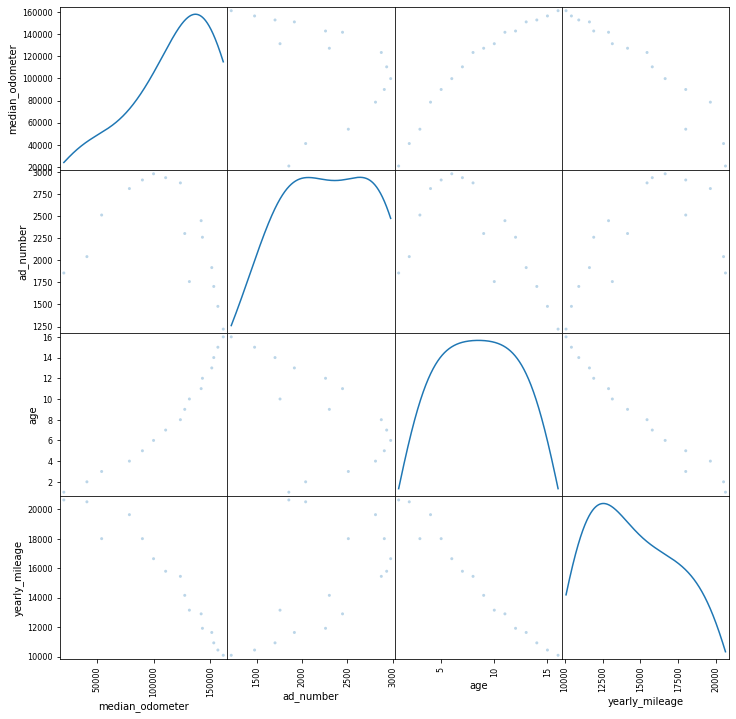

In [41]:
axes = pd.plotting.scatter_matrix(year_mileage_stat, alpha=0.3, figsize=(12,12), diagonal='kde')

In [42]:
cars = cars.dropna(subset =['model_year'])
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47906 non-null  int64         
 1   model_year    47906 non-null  Int16         
 2   model         47906 non-null  object        
 3   condition     47906 non-null  category      
 4   cylinders     43009 non-null  Int8          
 5   fuel          47906 non-null  category      
 6   odometer      40563 non-null  float64       
 7   transmission  47906 non-null  category      
 8   type          47906 non-null  category      
 9   paint_color   47906 non-null  object        
 10  is_4wd        47906 non-null  bool          
 11  date_posted   47906 non-null  datetime64[ns]
 12  days_listed   47906 non-null  int64         
dtypes: Int16(1), Int8(1), bool(1), category(4), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.0+ MB


Thus, we are left with 47906 data points so far, appr. 93% of the initial dataset.

[Back to Content](#content)

### Restoring missing values in `odometer` <a id = "odometer_mv"> <a/>

To restore the missing values in `odometer` we will analyze the mileage distribution in our "complete" data subset and we will do this for  `model_age` (we will add this new variable for the car age at the moment of listing), `condition` and `is_4wd`, drawing upon the common sense that those are the variables having the most correlation with the mileage, among all the variables at our disposale (we could add `model` as well, but in this case there will be too many small sub-groups with less robust estimates of the medians). We will check our assumtion that the median will comprise a better indicator for `odometer` than the mean (since there can be always outliers, some people drive a lot more that on average, and some a lot less; besides we have seen that there is considerable number of cases whith zero values for `odometer`). Then, we will extract median `odometer` values for each of the resulting sub-categories. Then, we will replace missing values with the mean or median using the fillna() method.

First, we add the `model_age` variable:

In [43]:
# `model_age` will inherite receive NaN values from `model_year`
cars['model_age'] = cars['date_posted'].dt.year - cars['model_year']

Let's create a subset without missing values, which we will employ in what follows to make the estimates for restoring the missing values, and print a few of its rows to make sure it looks fine.

In [44]:
cars_nn = cars.dropna(subset=['model_age', 'condition', 'is_4wd', 'odometer'])
len(cars_nn)/len(cars)

0.8467206612950361

In [45]:
cars_nn.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,4
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,6
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,6
9,9200,2008,honda pilot,excellent,<NA>,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,11
10,19500,2011,chevrolet silverado 1500,excellent,8,gas,128413.0,automatic,pickup,black,True,2018-09-17,38,7
11,8990,2012,honda accord,excellent,4,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,7


After excluding the missing values in the columns of interest, we are left with appr.78.7% of the initial dataset, which is well enough. Let's take a look at the distribution.

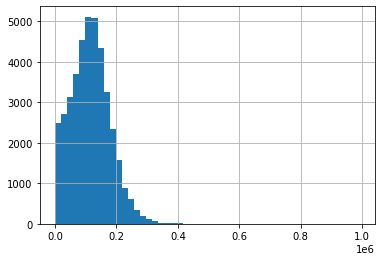

In [46]:
cars_nn['odometer'].hist(bins = 50)
plt.show()

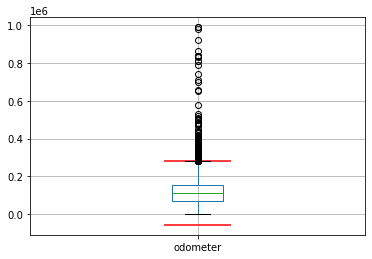

In [47]:
Q1 = cars_nn['odometer'].quantile(0.25)
Q3 = cars_nn['odometer'].quantile(0.75)
IQR = Q3 - Q1
#plt.ylim(-400,100000)
cars_nn[['odometer']].boxplot()
plt.hlines(y=Q1-1.5*IQR, xmin = 0.9, xmax = 1.1, color = 'red') # the theoretical value of the upper whisker
plt.hlines(y=Q3+1.5*IQR, xmin = 0.9, xmax = 1.1, color = 'red') # the theoretical value of the lower whisker
plt.show()

The theoretical value (Q1 - 1.5*IQR) of the lower whisker is below zero, so that the value plotted is the smallest data point that is greater than or equal to the theoretical value. In addition, we see considerable number of ouliers above the upper whisker. Let's add the numerical characteristics of this distribution.

In [48]:
#in total
cars_nn[['odometer']].describe()

,odometer
count,40563.000000
mean,115425.444099
std,65219.802462
min,0.000000
25%,70000.000000
50%,113000.000000
75%,155000.000000
max,990000.000000


In [49]:
# for year 2017
cars_nn[cars_nn['model_year'] == 2017]['odometer'].describe()

count      2040.000000
mean      47557.926471
std       27185.134777
min           0.000000
25%       29003.000000
50%       41000.000000
75%       62000.000000
max      217123.000000
Name: odometer, dtype: float64

We see, that the median is slightly lower than the mean, which is due to outliers, and the minimum `odometer` values is zero, which is unrealistic. Let's take a closer look at near-zero `odometer` values. 

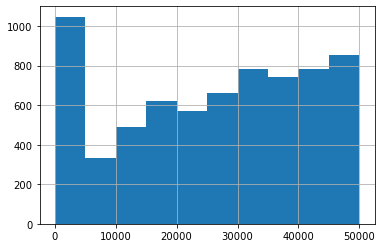

In [50]:
cars_nn['odometer'].hist(range=(0,50000))
plt.show()

There is a spike of near-zero values, which we need to investigate in details; first and foremost, we will study the distribution of `odometer` values vs. `model_year`. We will introduce a flag variable which we will call 'no_miles' to investigate the share of cars with low mileage by years. Obviously, if it is not a new car (we will call 2018 and 2019 cars new), `odometer` values have to be well above zero.

In [51]:
cars_nn['no_miles'] = cars_nn['odometer']< 500
cars_nn.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_age,no_miles
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7,False
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6,False
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,False
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,4,False
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3,False


We check the share of "no-miles" cars by years:

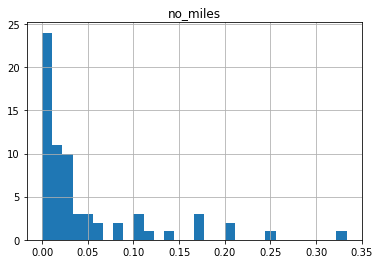

In [52]:
no_miles_stat = cars_nn.pivot_table(index='model_year', values='no_miles')
no_miles_stat.hist(bins=30)
plt.show()

In [53]:
no_miles_stat.describe()

,no_miles
count,67.000000
mean,0.046089
std,0.067808
min,0.000000
25%,0.000000
50%,0.021739
75%,0.050253
max,0.333333


For 75% of the years the share of ultra-low `odometer` values is less than 5%, but for 25% years it is between 5% and 33%. Let's see what is the latest year for which the share of postings with unrealistically low mileage is above 5%:

In [54]:
no_miles_stat.query('no_miles > 0.05').index.max()

1994

It would make sense to drop all the postings for the cars older than 25 years, which can be related to as "antic": their pricing should follow other model than a regular one for modern cars anyway (such listings are rare, the margins for condition and sentiment should have impact as well). To be on the safe side, let's check what is their share in the initial dataset. 

In [55]:
print(len(cars[cars['model_year'] <= 1994])/len(cars))

0.017262973322757065


The share of the "antic" cars in the current dataset is 1.7%, so we will drop them all together.

Note: if we make a zoom in into this "no-miles" positions...

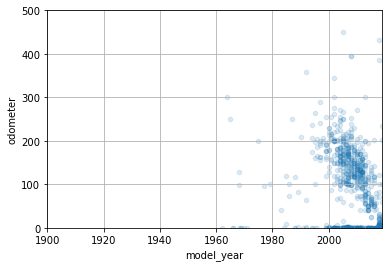

In [56]:
cars_nn.query('no_miles').plot(kind='scatter', y = 'odometer', x = 'model_year',
             xlim = (1900,2019), ylim=(0,500), alpha = 0.15, grid = True)
plt.show()

... and compare this scatterplot with the one where `odometer` values are higher than 500...

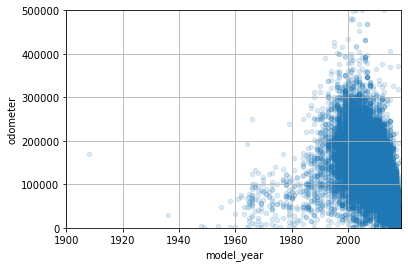

In [57]:
cars_nn.query('no_miles == False').plot(kind='scatter', y = 'odometer', x = 'model_year',
             xlim = (1900,2019), ylim=(0,500000), alpha = 0.15, grid = True)
plt.show()

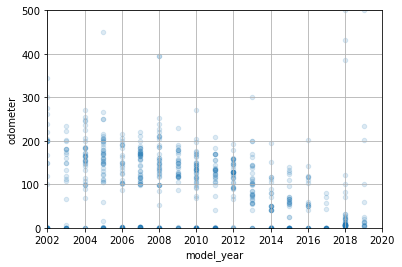

In [58]:
cars_nn.plot(kind='scatter', y = 'odometer', x = 'model_year',
             xlim = (2002,2020), ylim=(0,500), alpha = 0.15, grid = True)
plt.show()

... we will see that they follow the same pattern as the cars with `odometer` value higher than 500 (see below), which can point to the fact, that actually the values of the `odometer` variable of "no-miles" postings could be meant to appear in thousands, but ended up being a regular number. Were there more such cases, we could fix this, by multiplying the relevant `odometer` values by a thousands, but it does not make sense given the size of the sample.

To sum up, to treat the missing `odometer` values in the `cars` dataset, we will:
- drop the postings about "antic" cars (`model_year` below 1995) from the initial dataset;
- move to grouping and median calculation and filling in the missing values;
- drop all postings with (initially presented or restored) mileage below `500` miles.

In [59]:
cars = cars[cars['model_year']>=1995] # Remember, we have already dropped the rows with NaN values in `model_year`

Let's recap with regard to the current statistics on the `cars` dataframe:

In [60]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47079 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47079 non-null  int64         
 1   model_year    47079 non-null  Int16         
 2   model         47079 non-null  object        
 3   condition     47079 non-null  category      
 4   cylinders     42280 non-null  Int8          
 5   fuel          47079 non-null  category      
 6   odometer      39858 non-null  float64       
 7   transmission  47079 non-null  category      
 8   type          47079 non-null  category      
 9   paint_color   47079 non-null  object        
 10  is_4wd        47079 non-null  bool          
 11  date_posted   47079 non-null  datetime64[ns]
 12  days_listed   47079 non-null  int64         
 13  model_age     47079 non-null  Int64         
dtypes: Int16(1), Int64(1), Int8(1), bool(1), category(4), datetime64[ns](1), float64(1), i

Let's proceed to the medians and fill in the missing values for the '`odometer` variable. To recap, our intention is to calculate medians for subgroups of `model_age`, `condition`, and `is_4wd` to receive better approximations. To this end, we will define a function, called `sub_group_stat`, which will filter sub-groups of interest from the subset without missing data, calculate the values of an aggregate stats function (median value in our case) on particular column, `odometer` in our case, and fill in the missing values for the same sub-groups in the initial dataset with corresponding aggregated values.

In [61]:
"""
The sub_group_stat() function filters a sub-group from the subset without missing data,
calculates the median value for particular numeric column, `odometer` in our case,
and replaces the missing values for the same sub-group in the initial dataset with this median value.

The function takes 4 position paramaters:
 - df - the DataFrame of interest, DataFrame;
 - group_list - list of columns for grouping, for example:
         ['model','model_year','condition', 'is_4wd'];
 - column - the column for which the stats function should be calculates, str;
 - func - the requested stats function, str.
 
The function returns two DataFrames:
 - initial dataset with restored values for column;
 - func_df - a DataFrame with func and count values for every sub-group.

"""

def sub_group_stat(df, group_list, column, func):
    import pandas as pd
    
    # the subset without NaNs in column
    df_nn = df.dropna(subset=[column])
    # number of columns to group by
    gl = len(group_list)
    
    
    # calculate a DataFrame with func values for every sub-group
    # consists of Series on columns from group_list + the resulting column after applying func on column
    func_df = pd.DataFrame(df_nn.groupby(group_list, as_index=False)[column].agg([func, 'count']))
        
    # for each row of func_df, the DataFrame with sub-groups and func values for every sub-group
    # e.g. ["bachelor's degree", 'F', '20-29', 23481.1275]
    for i in range(0,len(func_df)):
        #the starting subset of all entries with missing values in column
        filtered_df = df[df[column].isna()]
        # filter entries with the same set of parameters as in the current sub-group i
        for j in range(0,gl):
            filter_val = func_df.iloc[i].name[j]
            filtered_df = filtered_df[filtered_df[group_list[j]]==filter_val] 
        # fill in missing values with the func column value for the current sub-group i
        filtered_df[column] = filtered_df[column].fillna(func_df.iloc[i].to_list()[0]) #the median el of the row i agg list
        # append the resulting DataFrame to the intial subset without NaNs
        df_nn = df_nn.append(filtered_df, ignore_index=True)
    
    # currently df_nn has all the missing values (for column variable) filled in
    return df_nn,func_df

Now let's try applying the `sub_group_stat()` function for the `odometer` column.

In [62]:
# the list of columns to group by
group_list = ['model_age','condition', 'is_4wd']
column = 'odometer'
func = 'median'

# we create a new DataFrame to not interfere with the initial dataset
cars_o1,func_df = sub_group_stat(cars, group_list,column,func)

Let's take a look at the summary table on the medians and counts for the sub-groups:

In [63]:
func_df.describe()

,median,count
count,255.000000,300.000000
mean,131472.209804,132.860000
std,56673.368610,211.559476
min,8.500000,0.000000
25%,100007.500000,2.000000
50%,136733.000000,23.500000
75%,170433.500000,179.750000
max,315000.000000,926.000000


255 sub-groups were classified for different combinations of `model_age`, `condition`, and `is_4wd`, ~156 cars on average per group. One questionable point is that 50% of the sub-groups have less than 40 ads and minimum one ad in them, which results in less robust estimates for median values; therefore, it looks like we have to compromise on less granular grouping; let's try `model_age` and `is_4wd`.

Note: as we have seen, by means of the correlation matrix, the mileage seems to have a stronger correlation with `model_age`, than with `cylinders` and `is_4wd`; it is worth noting that we should not blindly rely on the small absolute values of correlation coefficients for these two variables and `model_age`, bacause of the different nature and scale of the latter (it is better to standardize it before running the correlation estimate); nevertheless, applying `cylinders` for grouping purposes would result in too granular subgroups, similarly to the case of `condition` variable above, while we can reasonably assume that `is_4wd`, while being binary, can add accuracy to median mileage estimates - the mileage can differ with for cars with different usage purposes, for which `is_4wd` looks to be a good proxy.

In [64]:
# the list of columns to group by
group_list = ['model_age', 'is_4wd']
column = 'odometer'
func = 'median'

# we create a new DataFrame to not interfere with the initial dataset
cars,func_df = sub_group_stat(cars, group_list,column,func)

In [65]:
func_df.describe()

,median,count
count,50.000000,50.000000
mean,131252.520000,797.160000
std,46989.114456,500.964146
min,17988.000000,25.000000
25%,105285.250000,298.750000
50%,144828.000000,860.000000
75%,161420.500000,1211.250000
max,194617.000000,1594.000000


Now we have 50 sub-groups with a minimum of 25 ads in each, a good foundation for performing median estimates.

In [66]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47079 entries, 0 to 47078
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47079 non-null  int64         
 1   model_year    47079 non-null  Int16         
 2   model         47079 non-null  object        
 3   condition     47079 non-null  category      
 4   cylinders     42280 non-null  Int8          
 5   fuel          47079 non-null  category      
 6   odometer      47079 non-null  float64       
 7   transmission  47079 non-null  category      
 8   type          47079 non-null  category      
 9   paint_color   47079 non-null  object        
 10  is_4wd        47079 non-null  bool          
 11  date_posted   47079 non-null  datetime64[ns]
 12  days_listed   47079 non-null  int64         
 13  model_age     47079 non-null  Int64         
dtypes: Int16(1), Int64(1), Int8(1), bool(1), category(4), datetime64[ns](1), float64(1), i

Let's visualise the median mileage for cars of different ages and check to what extend it differs for 4wd cars as compared to non-4wd cars:

In [67]:
car_age_4wd_medians = func_df.reset_index().rename_axis(None, axis=1) #converting multi-index into columns

In [68]:
car_age_4wd_medians.head(1)

,model_age,is_4wd,median,count
0,0,False,18283.5,676


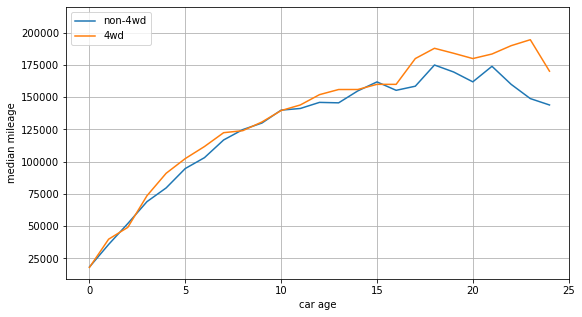

In [69]:
y1 = car_age_4wd_medians[car_age_4wd_medians['is_4wd'] == False]['median']
y2 = car_age_4wd_medians[car_age_4wd_medians['is_4wd']]['median']
x = car_age_4wd_medians[car_age_4wd_medians['is_4wd']]['model_age']


fig, ax = plt.subplots(figsize = (9,5))
ax.plot(x, y1, label='non-4wd')
ax.plot(x, y2, label='4wd')
ax.legend()
ax.set_xlabel('car age')
ax.set_ylabel('median mileage')
ax.grid()
ax.set_ylim(ymax=220000)
ax.set_xlim(xmax=25)
plt.show()

The median mileage is higher for cars older than 15 years only. Interestingly, this finding can point at some change in the ways people perceive their cars, and in their preferences accordingly, which took place in the beginning of 2000th.

Finally, we can drop the `odometer` values below 500:

In [70]:
cars = cars[cars['odometer'] >= 500]

In [71]:
len(cars)

46360

So far, we have preserved 46360 data points, appr. 90% of the initial dataset. Let's move on to the missing values in the `cylinders` variable.

[Back to Content](#content)

### Restoring missing values in `cylinders` <a id = "cylinders_mv" > <a/>

Let's recap on our correlation matrix:

In [72]:
cars.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,model_age
price,1.000000,0.515291,0.300854,-0.450751,0.325249,-0.003400,-0.513495
model_year,0.515291,1.000000,-0.119192,-0.652734,0.015403,-0.001665,-0.996143
cylinders,0.300854,-0.119192,1.000000,0.098245,0.416834,0.000176,0.118847
odometer,-0.450751,-0.652734,0.098245,1.000000,0.024311,0.003334,0.651200
is_4wd,0.325249,0.015403,0.416834,0.024311,1.000000,0.002591,-0.015536
days_listed,-0.003400,-0.001665,0.000176,0.003334,0.002591,1.000000,0.002588
model_age,-0.513495,-0.996143,0.118847,0.651200,-0.015536,0.002588,1.000000


Among all the variables, `cylinders` and `is_4wd` have the highest correlation coefficient. Let's explore this relationship in a bit more details.

Let's extract four subsets:

In [73]:
# `is_4wd is True, no NaN in `cylinders`
cars_is_4wd = cars[cars['is_4wd']].dropna()
# `is_4wd is False, no NaN in `cylinders`
cars_not_4wd = cars.query('is_4wd == False').dropna()
# `is_4wd is True, only NaN in `cylinders`
cars_is_4wd_cyl_nan = cars[cars['cylinders'].isna()].query('is_4wd == True')
# `is_4wd is False, only NaN in `cylinders`
cars_not_4wd_cyl_nan = cars[cars['cylinders'].isna()].query('is_4wd == False')

Now let's make some arithmetics:

In [74]:
print("`is_4wd is True, no NaN in `cylinders`:", len( cars_is_4wd))
print("`is_4wd is False, no NaN in `cylinders`:", len(cars_not_4wd))
print("`is_4wd is True, only NaN in `cylinders`:", len(cars_is_4wd_cyl_nan))
print("`is_4wd is False, only NaN in `cylinders`:", len(cars_not_4wd_cyl_nan))
print("Total count:", len(cars_is_4wd)+len(cars_not_4wd)+len(cars_is_4wd_cyl_nan)+len(cars_not_4wd_cyl_nan))

`is_4wd is True, no NaN in `cylinders`: 20888
`is_4wd is False, no NaN in `cylinders`: 20746
`is_4wd is True, only NaN in `cylinders`: 2324
`is_4wd is False, only NaN in `cylinders`: 2402
Total count: 46360


OK, the total is correct.

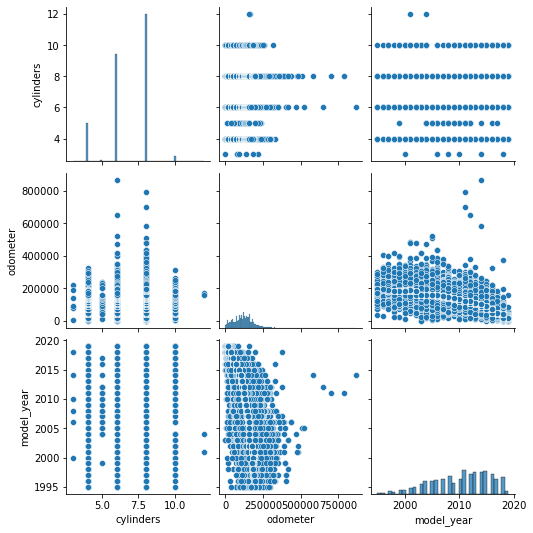

In [75]:
axes = sns.pairplot(cars_is_4wd[['cylinders', 'odometer', 'model_year']])

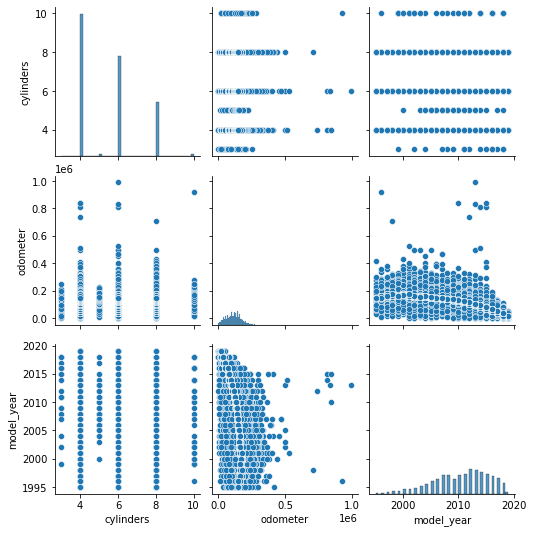

In [76]:
axes = sns.pairplot(cars_not_4wd[['cylinders', 'odometer', 'model_year']])

There is one substantial difference between these two subsets, which one can immediately observe from the upper left bar charts: the distribution of `cylinders` values is completely different for 4wd cars and non-4wd cars. Since the only obvious way to preserve the rows with the `cylinders` value missing, while lacking possibility to assign its exact value, is randomly assigning values for the `cylinders`, we have to take into account this difference in the two distributions:

To fill in the missing values in the subset of 4wd cars, we need to generate a sample of `len(cars_is_4wd_cyl_nan)` values from the `cars_is_4wd` distribution of the `cylinders` variable.

In [77]:
cars_is_4wd_dist = cars_is_4wd['cylinders'].value_counts(normalize=True).reset_index()

In [78]:
values_is_4wd = cars_is_4wd_dist['index'].to_list()
values_is_4wd

[8, 6, 4, 10, 5, 3, 12]

In [79]:
probabilities_is_4wd = cars_is_4wd_dist['cylinders'].to_list()
probabilities_is_4wd

[0.4911911145155113,
 0.35709498276522406,
 0.1286384527001149,
 0.019341248563768672,
 0.003351206434316354,
 0.00028724626579854464,
 9.574875526618154e-05]

In [80]:
num_4wd = len(cars_is_4wd_cyl_nan)
sample_4wd = np.random.choice(values_is_4wd, num_4wd, p=probabilities_is_4wd)

To fill in the missing values in the subset of non-4wd cars, we need to generate a sample of `len(cars_not_4wd_cyl_nan)` values from the `cars_not_4wd` distribution of the `cylinders` variable.

In [81]:
cars_not_4wd_dist = cars_not_4wd['cylinders'].value_counts(normalize=True).reset_index()

In [82]:
values_not_4wd = cars_not_4wd_dist['index'].to_list()
values_not_4wd

[4, 6, 8, 5, 10, 3]

In [83]:
probabilities_not_4wd = cars_not_4wd_dist['cylinders'].to_list()
probabilities_not_4wd

[0.4745011086474501,
 0.33201581027667987,
 0.17863684565699411,
 0.008338956907355635,
 0.005302226935312832,
 0.0012050515762074617]

In [84]:
num_n_4wd = len(cars_not_4wd_cyl_nan)
sample_n_4wd = np.random.choice(values_not_4wd, num_n_4wd, p=probabilities_not_4wd)

Now, let's substitute the `cylinder` columns in `cars_is_4wd_cyl_nan` and `cars_not_4wd_cyl_nan` correspondingly:

In [85]:
cars_is_4wd_cyl_nan['cylinders'] = sample_4wd

In [86]:
cars_not_4wd_cyl_nan['cylinders'] = sample_n_4wd

Now we can append the four subsets and reconstruct the dataset without missing values.

In [87]:
cars = cars_is_4wd.append(cars_not_4wd.append(cars_is_4wd_cyl_nan.append(cars_not_4wd_cyl_nan)))

In [88]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46360 entries, 0 to 47073
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         46360 non-null  int64         
 1   model_year    46360 non-null  Int16         
 2   model         46360 non-null  object        
 3   condition     46360 non-null  category      
 4   cylinders     46360 non-null  Int32         
 5   fuel          46360 non-null  category      
 6   odometer      46360 non-null  float64       
 7   transmission  46360 non-null  category      
 8   type          46360 non-null  category      
 9   paint_color   46360 non-null  object        
 10  is_4wd        46360 non-null  bool          
 11  date_posted   46360 non-null  datetime64[ns]
 12  days_listed   46360 non-null  int64         
 13  model_age     46360 non-null  Int64         
dtypes: Int16(1), Int32(1), Int64(1), bool(1), category(4), datetime64[ns](1), float64(1), 

In [89]:
cars.head(1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7


We have the missing values filled in and data types fixed.

[Back to Content](#content)

### Checking for duplicates <a id = "dups"> <a/>

There can be cases that the same car was listed several times, so we have to check whether there are cases like that. To this end, we will check implicitly duplicated rows. First, let's make a generic check:

In [90]:
cars.duplicated().sum()

0

There seems to be no duplicates if we check all the variables all together. Let's drop `days_listed` and calculated variables:

In [91]:
check_list = ['price','model_year', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'type', 'paint_color', 'is_4wd', 'date_posted']
#cars.duplicated(check_list).sum()
cars_dup = cars[cars.duplicated(check_list)]
len(cars_dup)

45

It turns out that there are 47 cases of duplicates, including `price` and `odometer` values. Let's take a look at them:

In [92]:
cars_dup[['price', 'odometer']]

,price,odometer
2646,14400,79556.0
7518,28990,53628.0
10839,42995,40800.0
10983,1,26492.0
11596,21400,94321.0
11885,31800,22838.0
14435,7990,149471.0
16220,1,48223.0
16650,21995,100580.0
18168,23000,129000.0


All the numbers, especially in the `odometer` column, are specific enough to say there cannot be any coincidence and those were posted at least one additional time on the same `date_posted`; thus, we can drop them:

In [93]:
cars.drop_duplicates(check_list, inplace = True)

In [94]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46315 entries, 0 to 47073
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         46315 non-null  int64         
 1   model_year    46315 non-null  Int16         
 2   model         46315 non-null  object        
 3   condition     46315 non-null  category      
 4   cylinders     46315 non-null  Int32         
 5   fuel          46315 non-null  category      
 6   odometer      46315 non-null  float64       
 7   transmission  46315 non-null  category      
 8   type          46315 non-null  category      
 9   paint_color   46315 non-null  object        
 10  is_4wd        46315 non-null  bool          
 11  date_posted   46315 non-null  datetime64[ns]
 12  days_listed   46315 non-null  int64         
 13  model_age     46315 non-null  Int64         
dtypes: Int16(1), Int32(1), Int64(1), bool(1), category(4), datetime64[ns](1), float64(1), 

Actually, if we continue and drop `date_posted` (assuming that the same car can be listed several time at different dates), we will encounter much more duplicates, which include `price` and `odometer` values as well (the latter we would consider being rather strange if the same car is listed some time later again), ~14% of the initial dataset actually:

In [95]:
check_list = ['price','model_year', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'type', 'paint_color', 'is_4wd']
#cars.duplicated(check_list).sum()
cars_dup = cars[cars.duplicated(check_list)]
len(cars_dup)

7095

For example, we can look at model "toyota tacoma":

In [96]:
cars_dup.query('model == "toyota tacoma"').head(30)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_age
1292,25900,2015,toyota tacoma,good,6,gas,74379.0,automatic,truck,silver,True,2018-05-29,10,3
2868,15985,2010,toyota tacoma,excellent,6,gas,131887.0,automatic,pickup,red,True,2019-03-01,99,9
8077,9500,2004,toyota tacoma,good,6,gas,200000.0,automatic,truck,silver,True,2018-08-18,37,14
13540,10999,2008,toyota tacoma,good,6,gas,191507.0,automatic,truck,blue,True,2018-08-05,42,10
14159,14400,2005,toyota tacoma,excellent,6,gas,79556.0,automatic,pickup,silver,True,2018-10-09,18,13
16452,15905,2006,toyota tacoma,good,6,gas,148951.0,automatic,truck,blue,True,2018-05-31,25,12
18678,15905,2006,toyota tacoma,good,6,gas,148951.0,automatic,truck,blue,True,2018-07-31,30,12
20938,18995,2011,toyota tacoma,excellent,6,gas,90099.0,automatic,truck,blue,True,2018-08-30,18,7
21203,25900,2015,toyota tacoma,good,6,gas,74379.0,automatic,truck,silver,True,2018-10-03,36,3
21382,34950,2016,toyota tacoma,like new,6,gas,20810.0,automatic,truck,white,True,2018-07-11,36,2


 There are examples of multiple duplicates (which appear more than twice at different `date_posted`) for which `price` and `odometer` values are the same, which looks rather suspicious; anyway, they do not provide any added value, given that we are investigating the price model; therefore we would rather drop them all together. 

In [97]:
cars.drop_duplicates(check_list, inplace = True)

In [98]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39220 entries, 0 to 47073
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         39220 non-null  int64         
 1   model_year    39220 non-null  Int16         
 2   model         39220 non-null  object        
 3   condition     39220 non-null  category      
 4   cylinders     39220 non-null  Int32         
 5   fuel          39220 non-null  category      
 6   odometer      39220 non-null  float64       
 7   transmission  39220 non-null  category      
 8   type          39220 non-null  category      
 9   paint_color   39220 non-null  object        
 10  is_4wd        39220 non-null  bool          
 11  date_posted   39220 non-null  datetime64[ns]
 12  days_listed   39220 non-null  int64         
 13  model_age     39220 non-null  Int64         
dtypes: Int16(1), Int32(1), Int64(1), bool(1), category(4), datetime64[ns](1), float64(1), 

In [99]:
cars.describe()

,price,model_year,cylinders,odometer,days_listed,model_age
count,39220.000000,39220.000000,39220.000000,39220.000000,39220.000000,39220.000000
mean,11759.686232,2009.900127,6.045156,119646.084255,39.594340,8.409230
std,9895.288368,5.300308,1.648031,60853.946279,28.283353,5.311971
min,1.000000,1995.000000,3.000000,500.000000,0.000000,0.000000
25%,4995.000000,2006.000000,4.000000,78398.250000,19.000000,4.000000
50%,8950.000000,2011.000000,6.000000,119000.000000,33.000000,8.000000
75%,15900.000000,2014.000000,8.000000,155436.750000,53.000000,12.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.000000,24.000000


[Back to Content](#content)

### Enrich data <a id = "enrich" > <a/>

Up until now, we have changed the type when the ad was placed to datetime and added the vehicle's age when the ad was placed. We have also look into the vehicle's average mileage per year while addressing the missing values in `model_year`. Let's add the corresponding column to the dataset:


In [100]:
cars['yearly_mileage'] = cars['odometer'].where(cars['model_age']==0, cars['odometer']/cars['model_age']).astype('int') 
    # we do not need decimal precision, since the odometer value itself is not precise.
    # for 2019 cars the average yearly mileage is equal total milage
cars.head(1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_age,yearly_mileage
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7,20714


Let's replace the `condition` values with numerical values to simplify the work with it. We will introduce additional variable `condition_num` and apply map() function for implementing it; by this opportunity we will unify `excellent` snf `like new` values into one category:

In [101]:
# the list of all values in `condition` 
cars['condition'].value_counts(normalize = True)

excellent    0.487761
good         0.376568
like new     0.097476
fair         0.033631
salvage      0.002346
new          0.002218
Name: condition, dtype: float64

In [102]:
x = {'new': 1, 'excellent': 2, 'good': 3, 'like new': 2, 'fair': 4, 'salvage': 5}

In [103]:
cars['condition_num'] = cars['condition'].map(x)
cars.head(1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_age,yearly_mileage,condition_num
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7,20714,3


[Back to Content](#content)

### Final check up of the clean data and summary

The data is ready for the analysis, let's take just another quick look at it.

In [104]:
# general info on the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39220 entries, 0 to 47073
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           39220 non-null  int64         
 1   model_year      39220 non-null  Int16         
 2   model           39220 non-null  object        
 3   condition       39220 non-null  category      
 4   cylinders       39220 non-null  Int32         
 5   fuel            39220 non-null  category      
 6   odometer        39220 non-null  float64       
 7   transmission    39220 non-null  category      
 8   type            39220 non-null  category      
 9   paint_color     39220 non-null  object        
 10  is_4wd          39220 non-null  bool          
 11  date_posted     39220 non-null  datetime64[ns]
 12  days_listed     39220 non-null  int64         
 13  model_age       39220 non-null  Int64         
 14  yearly_mileage  39220 non-null  int32         
 15  co

In [105]:
# a sample of the dataset - with the .tail() method for the sake of variety
cars.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_age,yearly_mileage,condition_num
46914,16000,1999,chevrolet corvette,excellent,4,gas,161950.0,manual,coupe,red,False,2019-02-09,141,20,8097,2
46921,1595,1999,toyota camry,good,6,gas,161950.0,automatic,sedan,unknown,False,2019-01-25,47,20,8097,3
46926,4900,1998,ram 1500,excellent,8,gas,161950.0,automatic,pickup,silver,False,2018-10-31,39,20,8097,2
46967,1150,1997,toyota camry,like new,4,gas,174000.0,automatic,sedan,grey,False,2018-10-04,17,21,8285,2
46968,5000,1997,toyota tacoma,excellent,8,gas,174000.0,automatic,pickup,white,False,2018-07-16,37,21,8285,2
47015,900,1996,ram 2500,fair,6,gas,160000.0,automatic,pickup,white,False,2018-06-19,54,22,7272,4
47029,1200,1997,chevrolet silverado,fair,6,gas,160000.0,automatic,truck,green,False,2019-02-15,27,22,7272,4
47049,12900,1995,ford f150,excellent,8,gas,148946.0,automatic,truck,white,False,2018-06-18,45,23,6475,2
47071,2895,1995,chevrolet camaro,excellent,4,gas,144000.0,automatic,coupe,white,False,2019-02-15,51,24,6000,2
47073,1750,1995,jeep grand cherokee,good,6,gas,144000.0,automatic,SUV,white,False,2019-04-02,24,24,6000,3


N.B. after all, we still have rows with sumilar `odometer` values, which most probably is an artifact of synthetic data.

To sum up, the following steps were performed at the Data Preprocessing stage:
- the type of `date_posted` was fixed to datetime;
- the data types of `model_year` and `cylinders` were fixed to integer;
- missing values in `is_4wd` were fileld in with nulls, the data type was fixed to boolean;
- missing values in `paint_color` were filled in with 'unknown' value;
- observations with missing values in `model_year` were dropped (due to the lack of an obvious way to restore them);
- missing values in `cylinders` were restored by random sampling from the existing distibution;
- missing values in `odometer` were restored by sub-grouping by `model_age` and `is_4wd` variables and conducting median estimates;
- finally, we enriched the data by adding `model_age`, `yearly_mileage`, and numerical form of `condition` variable.

[Back to Content](#content)

## 3. EDA <a id="eda"> <a/>

### Core parameters - outlier investigation <a id = "out_search" > <a/>

Let's study the following (core) parameters:
- Price
- Mileage (including yearly average)
- Type (including having 4wd or not)
- The vehicle's age when the ad was placed
- Number of cylinders
- Condition

We begin with studying the `price` and `odometer` variables by vehicle `type`. For the start, we check how many vehicles of each type are represented in the dataset<a id = "cat_cut_bus" > <a/>:

In [106]:
cars['type'].value_counts()

sedan          9875
SUV            9732
truck          8913
pickup         5282
coupe          1439
wagon          1008
mini-van        991
hatchback       841
van             460
convertible     305
other           199
offroad         163
bus              12
Name: type, dtype: int64

Only 12 buses, which is better do drop or to add to the "other" type. Let's do the latter:

In [107]:
# define the list of categories without 'bus'
types = cars['type'].value_counts().to_frame().index.to_list()[:-1]

In [108]:
# check 
print(types)

['sedan', 'SUV', 'truck', 'pickup', 'coupe', 'wagon', 'mini-van', 'hatchback', 'van', 'convertible', 'other', 'offroad']


In [109]:
# change the category for buses to 'other'
cars['type'] = cars['type'].where(cars['type'].isin(types), 'other')

In [110]:
# remove unused 'bus' category
cars['type'].cat.remove_unused_categories(inplace=True)

In [111]:
# check
cars['type'].value_counts()

sedan          9875
SUV            9732
truck          8913
pickup         5282
coupe          1439
wagon          1008
mini-van        991
hatchback       841
van             460
convertible     305
other           211
offroad         163
Name: type, dtype: int64

Let's look at `price` vs. `odometer`:

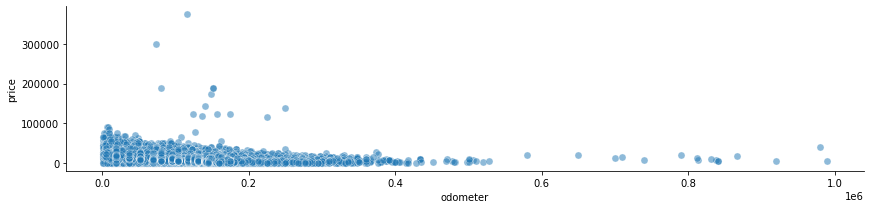

In [112]:
sns.relplot(y="price", x="odometer", alpha = 0.5, s = 50, data=cars, height = 3, aspect = 4);

Right, in general, as the mileage grows, the share of cheaper cars grows. Before proceeding to the next variables, we have to address outliers first.

[Back to Content](#content)

### Study and treat outliers - `price` <a id = "price_out" > <a/>

For the `price` variable, we see a small number of outliers with price tags above USD100K, which we can drop:

In [113]:
cars = cars.query('price <=100000')

Now, let's look separately at `price` and `odometer` and their distribution by rest of the variables in the list above; first, price:

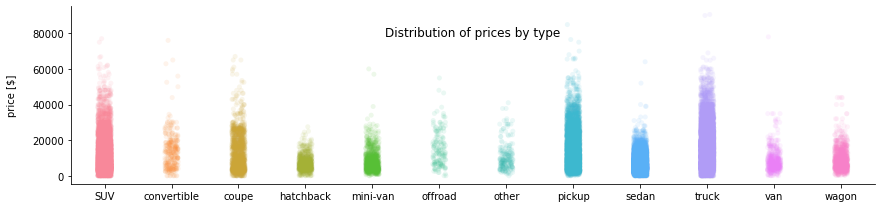

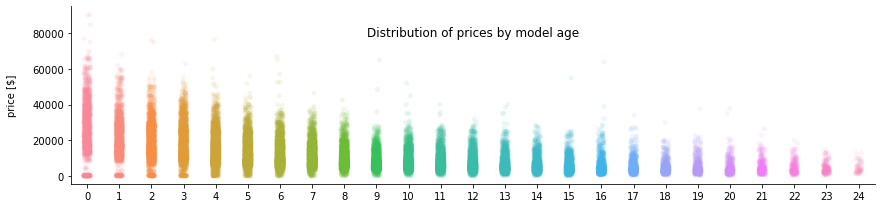

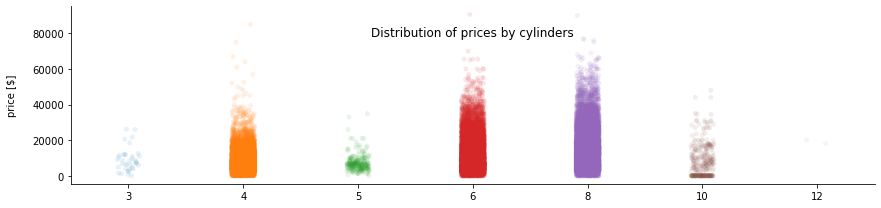

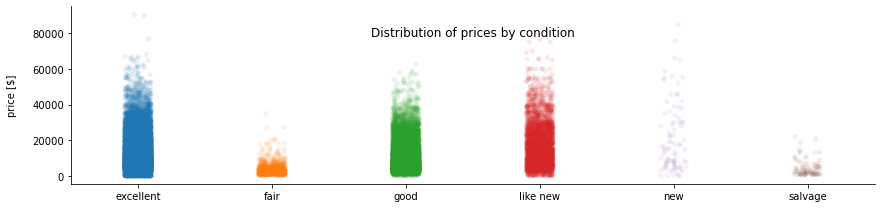

In [114]:
# Price
plot_list = ['type', 'model_age', 'cylinders', 'condition']

for var in plot_list:

    sns.catplot(x=var, y='price', data=cars, height=3, aspect=4, alpha = 0.1)
    plt.xlabel("")
    plt.ylabel("price [$]", labelpad=15)
    plt.title("Distribution of prices by {}".format(' '.join(var.split('_'))), y=0.8)

plt.show()

Adjusting the opacity of the data points allowed revealing of an interesting phenomena: let's make a zoom in.<a id = "price_out_zero" > <a/>

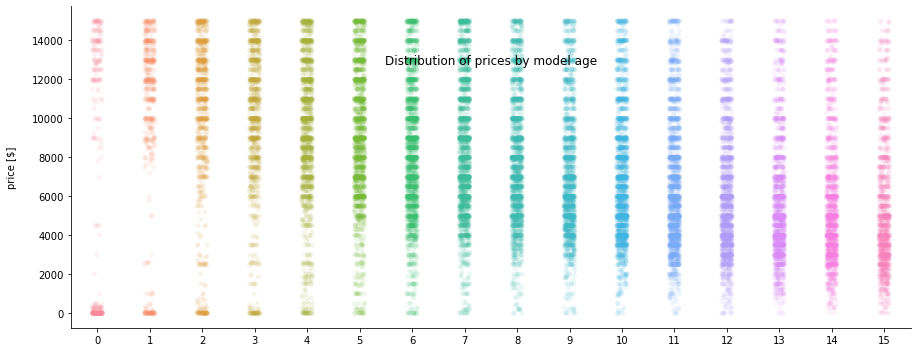

In [115]:
sns.catplot(x='model_age', y='price', data=cars[(cars['model_age']<=15) & (cars['price'] < 15000)], height=5, aspect=2.5, alpha = 0.1)
plt.xlabel("")
plt.ylabel("price [$]", labelpad=15)
plt.title("Distribution of prices by model age", y=0.8)

plt.show()

Obviously, the price of a new or almost new car cannot be zero or any near-zero number; we see less density in the distribution of `price` values by vehicle ages, which suggests choosing appropriate "cut-off" price to treat the unreaonable observations. E.g. USD6K for brand new cars, USD4K for 2 year old cars, etc. Let's check what is the share of brand new vehicles with the `price` value less than USD6K:

In [116]:
len(cars[(cars['model_age']==1) & (cars['price']<100)])/len(cars[cars['model_age']==1])

0.034353529044347283

In [117]:
len(cars[(cars['model_age']==1) & (cars['price']<8000)])/len(cars[cars['model_age']==1])

0.05683947532792005

9% of zero year old vehicles have the `price` value less than USD100 with another 2.8% with price tag between USD100 and USD8000. Interestingly, as oppose to working vehicles, there is literally no "salvage" vehicle which would have zero price tag (they start at least at USD400+):

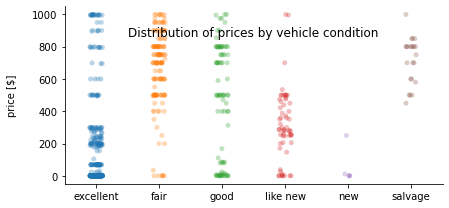

In [118]:
sns.catplot(x='condition', y='price', data=cars[cars['price'] < 1000], height=3, aspect=2, alpha = 0.3)
plt.xlabel("")
plt.ylabel("price [$]", labelpad=15)
plt.title("Distribution of prices by vehicle condition", y=0.8)

plt.show()

Let's calculate the lower `price` limits which we will use as a threshold to cut off rows with unreasonably low `price` values; aside to the zero year old vehicles we will assume the percentage of near-zero `price` observations is diminishing starting from 5% for one year old vehicles; we will construct a list of those "lower bound" price values and visualize it at the same time to see whether it looks reasonable:

In [119]:
# declaring the list for lower bound prices by vehicle age and for age values
zero_out = [8000]
age = [0]
for i in range(1,3):
    p = 0.05
    zero_out.append(int(cars[cars['model_age']==i]['price'].quantile(p)))
    age.append(i)

for i in range(3,5):
    p = 0.04
    zero_out.append(int(cars[cars['model_age']==i]['price'].quantile(p)))
    age.append(i)   

for i in range(5,7):
    p = 0.03
    zero_out.append(int(cars[cars['model_age']==i]['price'].quantile(p)))
    age.append(i)    
    
for i in range(7,13):
    p = 0.015
    zero_out.append(int(cars[cars['model_age']==i]['price'].quantile(p)))
    age.append(i)    

    
for i in range(13,15):
    p = 0.005
    zero_out.append(int(cars[cars['model_age']==i]['price'].quantile(p)))
    age.append(i)    
    
    
for i in range(15,len(cars['model_age'].unique())):
    p = 0.0005
    zero_out.append(150)
    age.append(i)


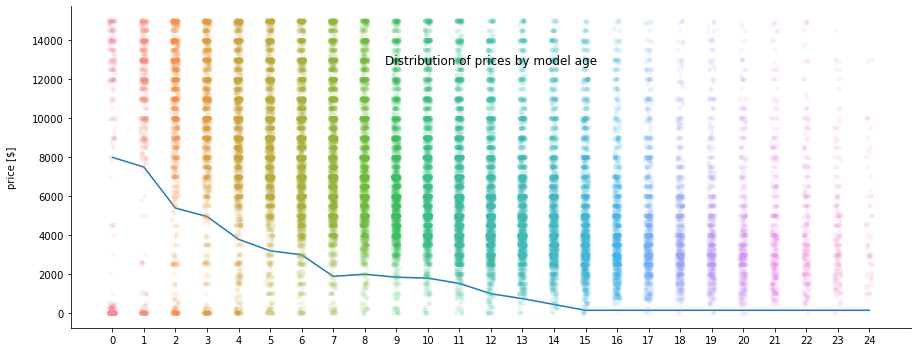

In [120]:
#visualise the price distribution and the lower bound prices by years
sns.catplot(x='model_age', y='price', data=cars[(cars['price'] < 15000)], height=5, aspect=2.5, alpha = 0.1)
plt.xlabel("")
plt.ylabel("price [$]", labelpad=15)
plt.title("Distribution of prices by model age", y=0.8)
plt.plot(age, zero_out)

plt.show()

In [121]:
# construct the clean dataset
car_total = pd.DataFrame()

for y in age:
    lp = zero_out[y]
    df = cars[cars['model_age'] == y]
    df = df[df['price'] > zero_out[y]]
    car_total = car_total.append(df)


In [122]:
# final check
car_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38184 entries, 53 to 47073
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           38184 non-null  int64         
 1   model_year      38184 non-null  Int16         
 2   model           38184 non-null  object        
 3   condition       38184 non-null  category      
 4   cylinders       38184 non-null  Int32         
 5   fuel            38184 non-null  category      
 6   odometer        38184 non-null  float64       
 7   transmission    38184 non-null  category      
 8   type            38184 non-null  category      
 9   paint_color     38184 non-null  object        
 10  is_4wd          38184 non-null  bool          
 11  date_posted     38184 non-null  datetime64[ns]
 12  days_listed     38184 non-null  int64         
 13  model_age       38184 non-null  Int64         
 14  yearly_mileage  38184 non-null  int32         
 15  c

#### Conclusions on the outliers for the `price` variable

To sum up, we first fixed the outliers by limiting the `price` variable from above by USD100K. Then, we found that some of the prices are zero or near-zero, which obviously cannot be the case: the price of a new or almost new car cannot be zero or any near-zero number; we then saw that as the `model_age` grows the issue turns to be less disturbing. An additional detail is that those cars belonging to the `salvage` condition category cost USD400+, there are no ads for `salvage` vehicles with zero or near-zero price. Drawing upon the density of the distribution of `price` values by vehicle ages, we built an estimate for a "cut-off" price to drop unreasonable observations, starting from USD8K for brand new cars and ending with USD150 for 25 year old cars. The graph below illustrates the resulting distribution.

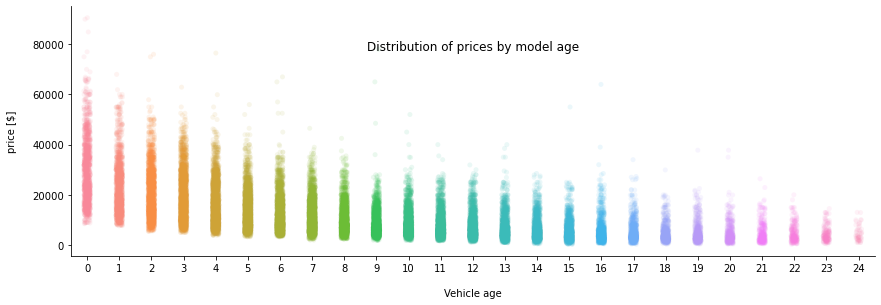

In [123]:
# final price distributions
sns.catplot(x='model_age', y='price', data=car_total, height=4, aspect=3, alpha = 0.1)
plt.xlabel("")
plt.ylabel("price [$]", labelpad=15)
plt.xlabel("Vehicle age", labelpad=15)
plt.title("Distribution of prices by model age", y=0.8)
#plt.set_ylim(ymin=0)

plt.show()

[Back to Content](#content)

### Study and treat outliers - `odometer` and `yearly_mileage` <a id = "mileage_out"> <a/>

Now, when the price distributions look reasonable. Let's move to mileage and average yearly mileage.

In addtion to the `price` variable, `odometer` outliers are also present, when the values are above 550 thousand miles. We will drop all the rows with those `odometer` outliers: 

In [124]:
cars = cars.query('odometer <=550000')

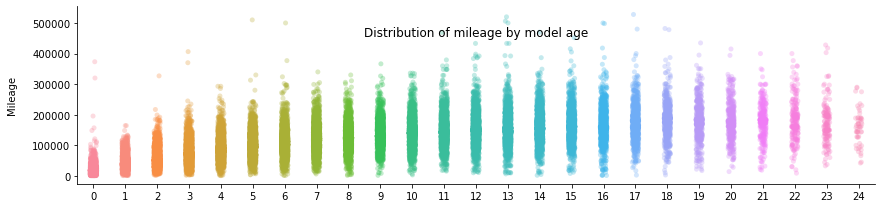

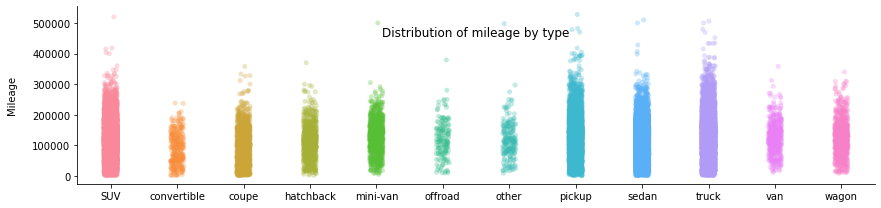

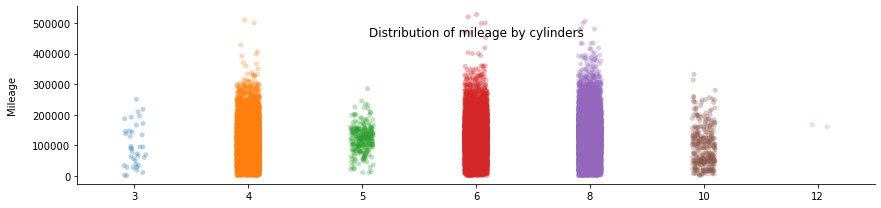

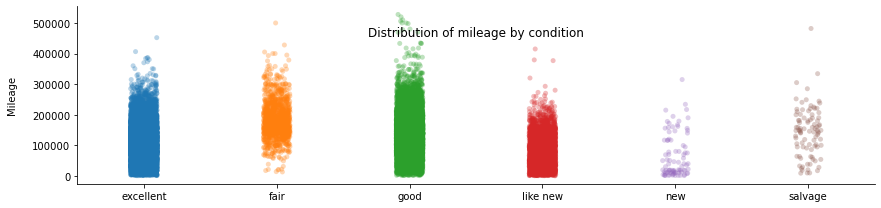

In [125]:
# Odometer
plot_list = ['model_age', 'type', 'cylinders', 'condition']

for var in plot_list:

    sns.catplot(x=var, y='odometer', data=cars, height=3, aspect=4, alpha = 0.3)
    plt.xlabel("")
    plt.ylabel("Mileage", labelpad=15)
    plt.title("Distribution of mileage by {}".format(' '.join(var.split('_'))), y=0.8);

plt.show()

Let's check whether the values of `yearly_mileage` look reasonable as well<a id = "yearly_mileage_out" > <a/>:

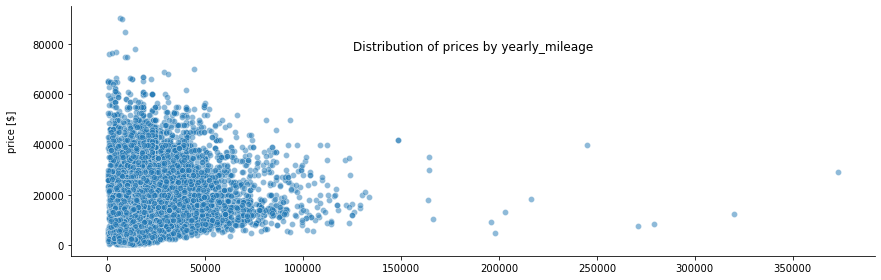

In [126]:
# final price distribution by `model_year`
sns.relplot(x='yearly_mileage', y='price', data=car_total, height=4, aspect=3, alpha = 0.5)
plt.xlabel("")
plt.ylabel("price [$]", labelpad=15)
#plt.xlabel("Vehicle manufacturing year", labelpad=15)
plt.title("Distribution of prices by yearly_mileage", y=0.8)
#plt.set_ylim(ymin=0)

plt.show()

We see that there are still several outliers, for which the average yearly mileage has extreme values. We will limit it by 140000 (which means non-stop driving 250 days per year, 8 hour shift with an average speed of 70 miles per hour:

In [127]:
car_total = car_total.query('yearly_mileage < 140000')

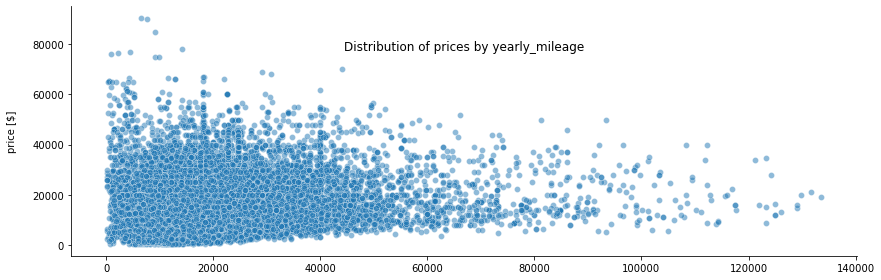

In [128]:
# final price distribution by `model_year`
sns.relplot(x='yearly_mileage', y='price', data=car_total, height=4, aspect=3, alpha = 0.5)
plt.xlabel("")
plt.ylabel("price [$]", labelpad=15)
#plt.xlabel("Vehicle manufacturing year", labelpad=15)
plt.title("Distribution of prices by yearly_mileage", y=0.8)
#plt.set_ylim(ymin=0)

plt.show()

Now this distribution look reasonable as well. Note: as we have seen earlier, older vehicles, which naturally cost less, have lower average yearly mileage.

[Back to Content](#content)

## Study parameters without outliers

Let's ensure that we have enough data points for categorical variables in each category. To this end, we will define a function which will filter out all the categories with less than 50 observations for the fiven column in the dataframe. <a id = "cat_cut" > <a/>


In [129]:
def param_func(df, param):
    """
    param_func() is a function which takes a column name for a categorical variable,
    builds list of categories,
    filters out all categories which have less than 50 data poitns,
    and filters the dataframe by the rest of categories.
    
    It takes two positional parameters:
    df  - dataframe
    param - series name within this dataframe
    
    """
    stat = df[param].value_counts() # counts on categories in the variable under consideration
    stat_good = stat[lambda x: x>50].dropna() # filtering the categories
    ind = stat_good.index.to_list() # list of the categories after filtering
    df = df[df[param].isin(ind)] # filtering the dataframe for it to include only categories from the "ind" list
    return df

Let's apply this function to the categories on the following list:

In [130]:
categorical = ['model', 'condition', 'cylinders', 'fuel', 'transmission', 'type', 'paint_color']

In [131]:
for cat in categorical:
    car_total = param_func(car_total, cat)

Now we can build type-wise `price` vs. `odometer` plots; we will add `is_4wd` distinction:

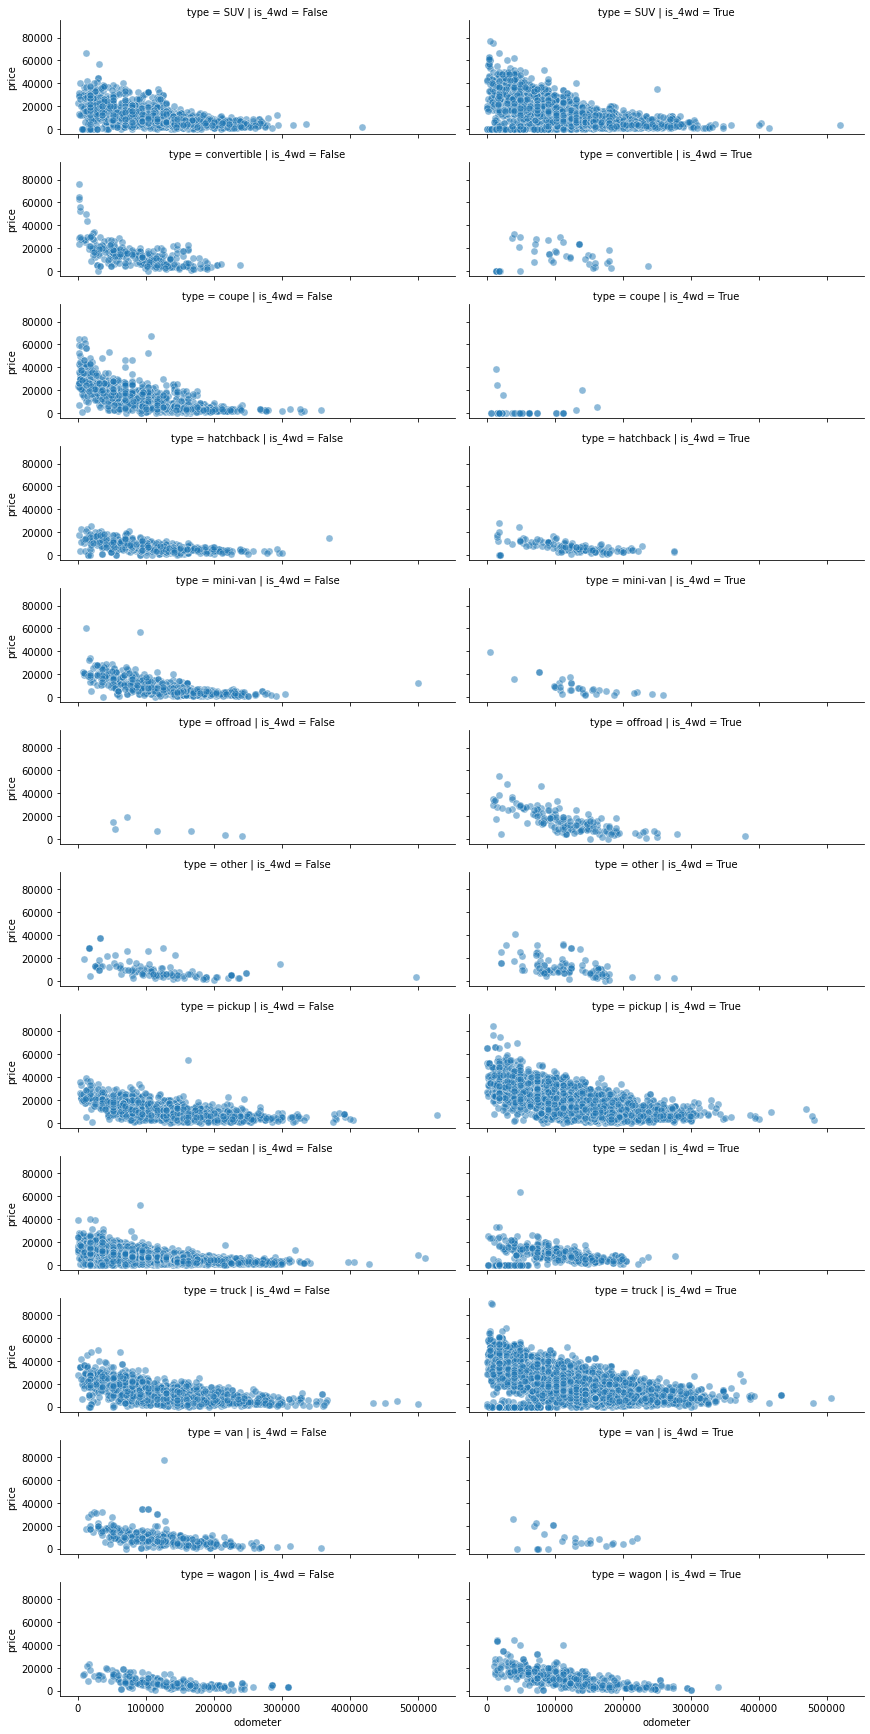

In [132]:
sns.relplot(y="price", x="odometer", row="type", col="is_4wd", alpha = 0.5,
            s = 50, data=cars, height = 2, aspect = 3);

[Back to Content](#content)

Let's recap, currently we have the following list of price factors:
- **`model_year`** — vehicle manufacturing year
- `model`
- *`condition`*
- *`cylinders`*
- **`fuel`** — gas, diesel, etc.
- *`odometer`* — the vehicle's mileage when the ad was published
- **`transmission`**
- **`type`**
- **`paint_color`**
- **`is_4wd`** — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal
- *`model_age`* — the difference between year when the ad was published and the model year
- *`yearly_mileage`* — the result of dividing `odometer` value by `model_age`

#### Numerical variables <a id = "corr" > <a/>

As it follows from the correlation matrix, **vehicle manufacturing year** (`model_year`) or vehicle age at the date of ad publication (`model_age`) and **having 4wd** (`is_4wd`) are among factors having the most correlation with the `price` variable, while the total mileage (`odometer`), `condition` and average yearly mileage (`yearly_mileage`) are more correlated with the manufacturing year and `cylinders` has higher correlation with vehicle having 4wd or not. Note: PCA can be applied to explore whether any of these four variables is a necessary dimension in the presence of `model_year`.

In [133]:
car_total.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,model_age,yearly_mileage,condition_num
price,1.000000,0.601285,0.299884,-0.534612,0.358594,-0.002950,-0.599164,0.276162,-0.273989
model_year,0.601285,1.000000,-0.147648,-0.654947,-0.000683,0.000714,-0.996191,0.532447,-0.331736
cylinders,0.299884,-0.147648,1.000000,0.133893,0.418508,0.001665,0.146808,-0.039559,0.059168
odometer,-0.534612,-0.654947,0.133893,1.000000,0.049012,0.004526,0.653397,-0.011888,0.316003
is_4wd,0.358594,-0.000683,0.418508,0.049012,1.000000,0.003814,0.000389,0.047676,-0.006212
days_listed,-0.002950,0.000714,0.001665,0.004526,0.003814,1.000000,0.000125,0.000207,0.003855
model_age,-0.599164,-0.996191,0.146808,0.653397,0.000389,0.000125,1.000000,-0.541808,0.330828
yearly_mileage,0.276162,0.532447,-0.039559,-0.011888,0.047676,0.000207,-0.541808,1.000000,-0.109758
condition_num,-0.273989,-0.331736,0.059168,0.316003,-0.006212,0.003855,0.330828,-0.109758,1.000000


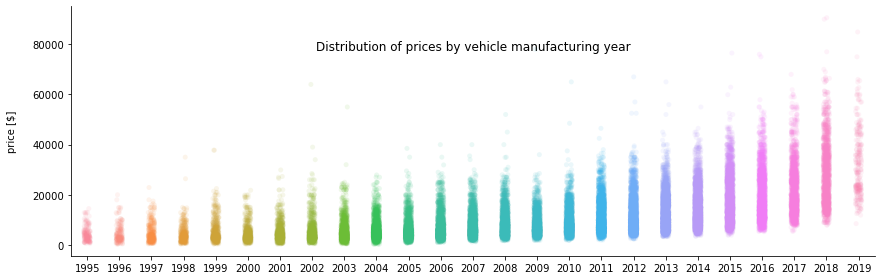

In [134]:
# final price distribution by `model_year`
sns.catplot(x='model_year', y='price', data=car_total, height=4, aspect=3, alpha = 0.1)
plt.xlabel("")
plt.ylabel("price [$]", labelpad=15)
#plt.xlabel("Vehicle manufacturing year", labelpad=15)
plt.title("Distribution of prices by vehicle manufacturing year", y=0.8)
#plt.set_ylim(ymin=0)

plt.show()

[Back to Content](#content)

#### Categorical variables <a id = "boxplot" > <a/>

Let's employ boxplots to take a closer look at categorical variables under investigation.

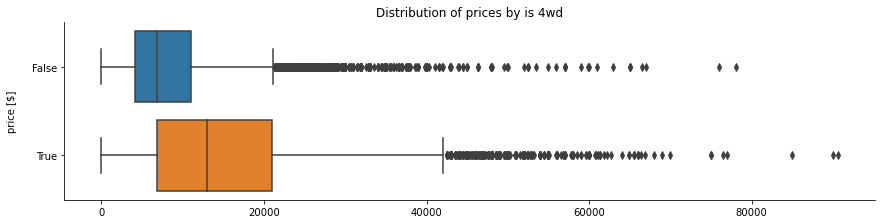

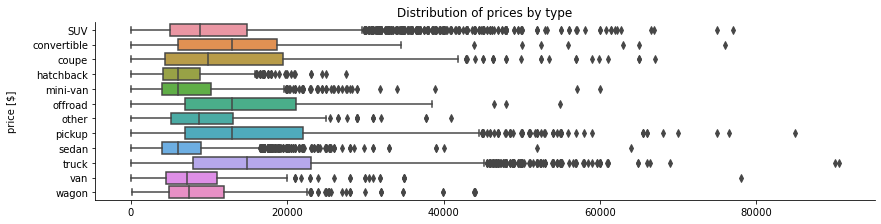

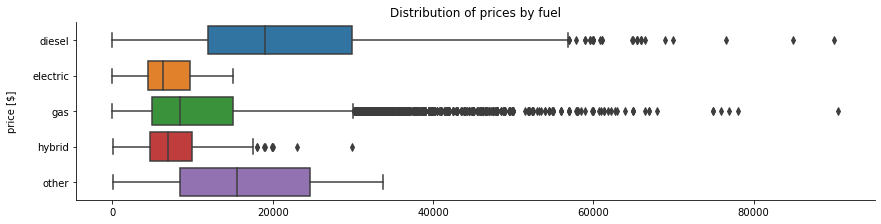

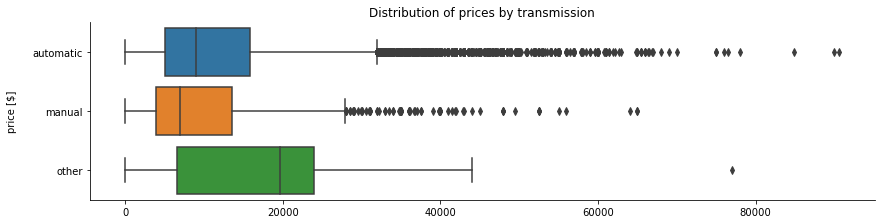

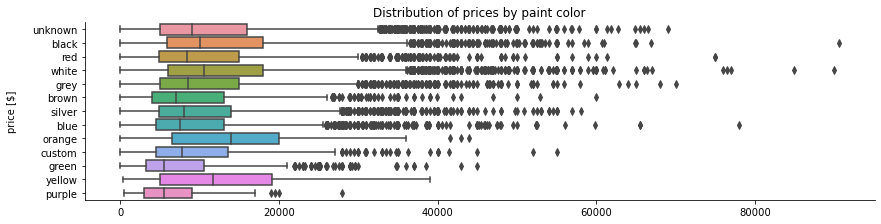

In [135]:
plot_list = ['is_4wd', 'type', 'fuel', 'transmission', 'paint_color'] # will take a look at `model` later

for var in plot_list:

    sns.catplot(y=var, x='price', data=cars, kind = 'box', height=3, aspect=4, orient="h")
    plt.xlabel("")
    plt.ylabel("price [$]", labelpad=15)
    plt.title("Distribution of prices by {}".format(' '.join(var.split('_'))), y=1)

plt.show()

This short boxplot analysis suggests there are significant differences in prices of vehicles for particular categories: similarly to the `is_4wd` variable, we see stronger differences in the distributions for `type` and `paint_color` and some difference for `fuel`; `transmission` does not seem to play role (besides, most of the vehicles are automatic). Note: the structure of the boxes and the large amount of outliers clearly show that the variables under consideration follow other type of distribution, presumably lognormal, rather the normal one.

[Back to Content](#content)

#### Example - Median price per each type of vehicle

Let's recall that the highest amoutns of ads were for `SUV`, `truck`, `sedan`, `pickup`, and `coupe` types and consider prices of these types as an example; to receive more meaningful results, we will estimate the medians for different types of vehicles for specific cohort, of "young' vehicles, 3 year and less old.

In [136]:
# final price distributions
prices_stat = car_total[car_total['model_age']<4].pivot_table(index = 'type',
                                            values = 'price', aggfunc = ['median', 'count']).reset_index()
prices_stat.columns = ['type', 'median_price', 'ad_count']

# the order for this slice is  `sedan`, `truck`, `SUV`, `pickup`, and `coupe`
prices_stat = prices_stat.sort_values('ad_count', ascending = False) 

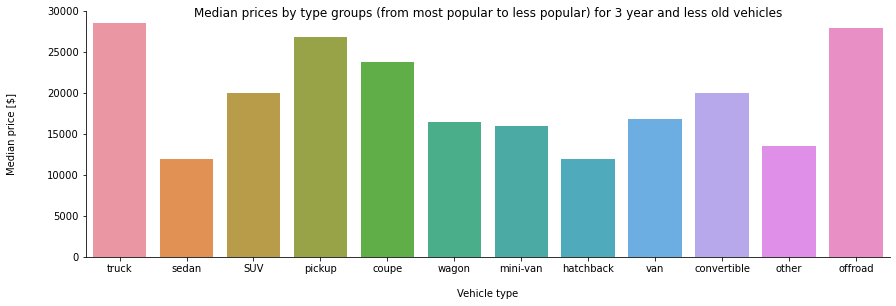

In [137]:
sns.catplot(x='type', y='median_price', data=prices_stat, kind = 'bar', height = 4,
            aspect = 3, order=prices_stat['type'])
plt.xlabel("Vehicle type", labelpad = 15)
plt.ylabel("Median price [$]", labelpad=30)
plt.title("Median prices by type groups (from most popular to less popular) for 3 year and less old vehicles",
          y=0.95, x = 0.5)

plt.show()

We see that median prices for TOP5 vehicle types (on the left) differ significantly.

[Back to Content](#content)

## 4. Hypotheses testing <a id="testing"> <a/>

In what follows we employ basic numerical method of search for correlations between pairs of variables. Without entering into deep investigation, we still prefere conducting a couple of statistical significance checks for selected sample means. To this end, we employ [Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test) to test the hypothesis that two populations (category samples) have equal means. Welch's t-test is considered to be more reliable when the two samples have unequal sample sizes (also, when the two samples have unequal variances or when it is unknown whether the two samples have equal variances; we will check this in what follows by applying the Leven test - see below). The Python implementation of this test is [`scipy.stats.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function.

Before running the t-test, we will employ [the Levene test for equal variances](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35a.htm). The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test has better performance in cases with significant deviations from normality (which we have already observed). The Python implementation of this test is [`scipy.stats.levene()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) function.

To make it easier to draw conclusions with regard to the impact of different variables, we choose two subsets of vehicles of different `type` ("SUV" and "truck") and run Welch t-test for different slices of these two subsets; we introduce a dictionary for documenting the hypotheses testing results:

In [138]:
ht_results = {}

### Correlation between `price` and vehicle `type`

In [139]:
# define the two samples
suv = car_total[car_total['type']=='SUV']
truck = car_total[car_total['type']=='truck']

#### Levene test

1. Null-hypothesis: `SUV`'s and `truck`'s samples have equal variance;
2. p-value: 5%;
3. The alternative hypothsis is that `SUV`'s and `truck`'s samples have different variance. If the p-value is smaller than 5%, then we have evidence against the null hypothesis of equal variance, so that we can define the `equal_var` attribute of the t-test as `False`.

In [140]:
stat, p = stats.levene(suv['price'], truck['price'])
p

2.5308835182331314e-125

The p-value is essentially zero, so a conclusion can be made that the two samples under consideration have different variances.

#### t-test

1. Null hypothesis: `SUV`'s and `truck`'s samples have equal means, i.e. they come from the same population, which, in turn, would mean that there is no meaning to the `type` variable;
2. p-value: 5%;
3. We will use the default two-sided version, i.e. the alternative hypothesis is that `SUV`'s and `truck`'s samples have different means; if the p-value is smaller than 5%, we will have evidence against the null hypothesis of equal population means.

In [141]:
ht_results['type'] = stats.ttest_ind(suv['price'], truck['price'], equal_var=False)
ht_results['type']

Ttest_indResult(statistic=-37.947748668938075, pvalue=3.123148116485161e-302)

The null-hypothesis is rejected; two samples have different means, i.e. vehicles of these two types have different pricing.

### Correlation between `price` and `model_year`

In [142]:
# define the two samples
model_year_2014_suv = suv[suv['model_year'] == 2014]
model_year_2015_suv = suv[suv['model_year'] == 2015]

#### Levene test

1. Null-hypothesis: 2014 `SUV`'s and 2015 `SUV`'s samples have equal variance;
2. p-value: 5%;
3. The alternative hypothsis is that 2014 `SUV`'s and 2015 `SUV`'s samples have different variance. If the p-value is smaller than 5%, then we have evidence against the null hypothesis of equal variance, so that we can define the `equal_var` attribute of the t-test as `False`.

In [143]:
stat, p = stats.levene(model_year_2014_suv['price'], model_year_2015_suv['price'])
p

2.0109383949418323e-15

The p-value is essentially zero, so a conclusion can be made that the two samples under consideration have different variances.

#### t-test

1. Null hypothesis: 2014 `SUV`'s and 2015 `SUV`'s samples have equal means, i.e. they come from the same population, which, in turn, would mean that there is no meaning to the `model_year` variable;
2. p-value: 5%;
3. We will use the default two-sided version, i.e. the alternative hypothesis is that 2014 `SUV`'s and 2015 `SUV`'s samples have different means; if the p-value is smaller than 5%, we will have evidence against the null hypothesis of equal population means.

In [144]:
ht_results['model_year'] = stats.ttest_ind(model_year_2014_suv['price'], model_year_2015_suv['price'], equal_var=False)
ht_results['model_year']

Ttest_indResult(statistic=-10.754578665926442, pvalue=1.1010553150831482e-25)

The null-hypothesis is rejected; two samples have different means, i.e. vehicles of these two years have different pricing.

### Correlation between `price` and `is_4wd`

In [145]:
# define the two samples
is_4wd_suv = suv[suv['is_4wd']]
is_not_4wd_suv = suv[suv['is_4wd'] == False]

#### Levene test

1. Null-hypothesis: samples with 4wd and without have equal variance;
2. p-value: 5%;
3. The alternative hypothsis is thatsamples with 4wd and without have different variance. If the p-value is smaller than 5%, then we have evidence against the null hypothesis of equal variance, so that we can define the `equal_var` attribute of the t-test as `False`.

In [146]:
stat, p = stats.levene(is_4wd_suv['price'], is_not_4wd_suv['price'])
p

1.0746638347855612e-38

The p-value is essentially zero, so a conclusion can be made that the two samples under consideration have different variances.

#### t-test

1. Null hypothesis: samples with 4wd and without have equal means, i.e. they come from the same population, which, in turn, would mean that there is no meaning to the `is_4wd` variable;
2. p-value: 5%;
3. We will use the default two-sided version, i.e. the alternative hypothesis is that samples with 4wd and without have different means; if the p-value is smaller than 5%, we will have evidence against the null hypothesis of equal population means.

In [147]:
ht_results['is_4wd'] = stats.ttest_ind(is_4wd_suv['price'], is_not_4wd_suv['price'], equal_var=False)
ht_results['is_4wd']

Ttest_indResult(statistic=13.064904651817008, pvalue=1.553229335008426e-38)

The null-hypothesis is rejected; two samples have different means, i.e. vehicles with 4wd and without have different pricing.

### Correlation between `price` and `fuel`

In [148]:
# define the two samples
gas_suv = suv[suv['fuel'] == 'gas']
diesel_suv = suv[suv['fuel'] == 'diesel']

#### Levene test

1. Null-hypothesis: gas `SUV`'s and diesel `SUV`'s samples have equal variance;
2. p-value: 5%;
3. The alternative hypothsis is that gas and diesel vehicle samples have different variance. If the p-value is smaller than 5%, then we have evidence against the null hypothesis of equal variance, so that we can define the `equal_var` attribute of the t-test as `False`.

In [149]:
stat, p = stats.levene(gas_suv['price'], diesel_suv['price'])
p

0.9664133992559227

The p-value is ~0.97, so the null hypothesis cannot be rejected: the two samples under consideration have equal variances.

#### t-test

1. Null hypothesis: gas `SUV`'s and diesel `SUV`'s samples have equal means, i.e. they come from the same population, which, in turn, would mean that there is no meaning to the `fuel` variable;
2. p-value: 5%;
3. We will use the default two-sided version, i.e. the alternative hypothesis is that gas and diesel vehicle samples have different means; if the p-value is smaller than 5%, we will have evidence against the null hypothesis of equal population means.

In [150]:
ht_results['fuel'] = stats.ttest_ind(gas_suv['price'], diesel_suv['price'], equal_var=True)
ht_results['fuel']

Ttest_indResult(statistic=-2.020246318298087, pvalue=0.04338600757577328)

At the 5% level of confidence, the null-hypothesis should be rejected, although it could not be rejected for confidence levels less than 4%; this result suggests than some sub-samples of gas and diesel vehicles can have different means (and variances). All in all, fuel type has less profound impact on pricing.

### Correlation between `price` and `transmission`

In [151]:
# define the two subsets
automatic_suv = suv[suv['transmission'] == 'automatic']
manual_suv = suv[suv['transmission'] == 'manual']

To recap, from the analysis of `paint_color` distribution and its correlation with other variables, we know that the share of manual vehicles is very modest, let's check it again for these two samles:

In [152]:
len(manual_suv)/(len(automatic_suv)+len(manual_suv))

0.04018284256404805

Only 4% of all `SUV` vehicles have manual transmission, so that it is even more interesting whether there is any impact for this variable, since automatic vehicles comprise the majority in the dataset under consideration.

#### Levene test

1. Null-hypothesis: automatic `SUV`'s and manual `SUV`'s samples have equal variance;
2. p-value: 5%;
3. The alternative hypothsis is that gas and diesel vehicle samples have different variance. If the p-value is smaller than 5%, then we have evidence against the null hypothesis of equal variance, so that we can define the `equal_var` attribute of the t-test as `False`.

In [153]:
stat, p = stats.levene(automatic_suv['price'], manual_suv['price'])
p

0.5045331367304235

The p-value is ~0.36, so the null hypothesis cannot be rejected: the two samples under consideration have equal variances.

#### t-test

1. Null hypothesis: automatic `SUV`'s and manual `SUV`'s samples have equal means, i.e. they come from the same population, which, in turn, would mean that there is no meaning to the `transmission` variable;
2. p-value: 5%;
3. We will use the default two-sided version, i.e. the alternative hypothesis is that gas and diesel vehicle samples have different means; if the p-value is smaller than 5%, we will have evidence against the null hypothesis of equal population means.

In [154]:
ht_results['transmission'] = stats.ttest_ind(automatic_suv['price'], manual_suv['price'], equal_var=False)
ht_results['transmission']

Ttest_indResult(statistic=-1.4482036344584344, pvalue=0.14831317866480548)

The null-hypothesis cannot be rejected; either transmission does not have impact on pricing or the subset of manual vehicles does not have enough observations.

### Correlation between `price` and `paint_color`

In [155]:
# define the two samples
black_suv = suv[suv['paint_color'] == 'black']
grey_suv = suv[suv['paint_color'] == 'grey']

#### Levene test

1. Null-hypothesis: black `SUV`'s and grey `SUV`'s samples have equal variance;
2. p-value: 5%;
3. The alternative hypothsis is that gas and diesel vehicle samples have different variance. If the p-value is smaller than 5%, then we have evidence against the null hypothesis of equal variance, so that we can define the `equal_var` attribute of the t-test as `False`.

In [156]:
stat, p = stats.levene(black_suv['price'], grey_suv['price'])
p

0.00029792651300883935

The p-value is very low, so a conclusion can be made that the two samples under consideration have different variances.

#### t-test

1. Null hypothesis: black `SUV`'s and grey `SUV`'s samples have equal means, i.e. they come from the same population, which, in turn, would mean that there is no meaning to the `paint_color` variable;
2. p-value: 5%;
3. We will use the default two-sided version, i.e. the alternative hypothesis is that gas and diesel vehicle samples have different means; if the p-value is smaller than 5%, we will have evidence against the null hypothesis of equal population means.

In [157]:
ht_results['paint_color'] = stats.ttest_ind(black_suv['price'], grey_suv['price'], equal_var=False)
ht_results['paint_color']

Ttest_indResult(statistic=5.885394455449053, pvalue=4.619767125955805e-09)

The null-hypothesis is rejected; two samples have different means, i.e. vehicles of these two colors have different pricing.

[Back to Content](#content)

### A word about advertisement lifetime

Unless prices, the average number of days for an advertisements to be displayed (`days_listed`) is similar across the variables; average lifetime of an ad is around 40 days, while the median is around 32 days, which means there are ads with rather long time on the platform:

In [158]:
# final price distributions
ads_stat = car_total.pivot_table(index = 'type', values = 'days_listed', aggfunc = 'median').reset_index()
ads_stat.columns = ['type', 'median_ad_lifetime']

In [159]:
ads_stat

,type,median_ad_lifetime
0,SUV,33
1,convertible,31
2,coupe,33
3,hatchback,35
4,mini-van,32
5,offroad,32
6,other,32
7,pickup,33
8,sedan,33
9,truck,33


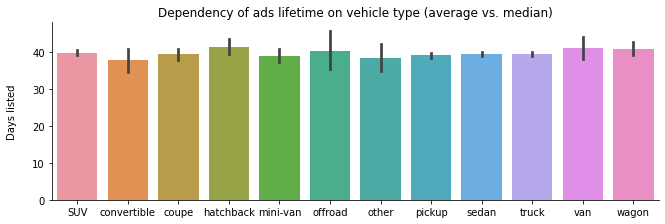

In [160]:
# average 'days_listed' distribution by `model_year`
sns.catplot(y='days_listed', x='type', data=car_total, kind = 'bar', height=3, aspect=3)
#plt.plot(ads_stat['type'],ads_stat['median_ad_lifetime']) # adding the line worked locally only
plt.xlabel("")
plt.ylabel("Days listed", labelpad=15)
plt.title("Dependency of ads lifetime on vehicle type (average vs. median)", y=1)
#plt.set_ylim(ymin=0)

plt.show()

Let's check the stats for ads `days_listed`:

In [161]:
car_total['days_listed'].describe()

count    38123.000000
mean        39.610235
std         28.302145
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

For 25% of ads their lifetime on the platform is half shorter than on average, while there are ads for which where delisted after 200 days and more. A quick look at those observations with `days_listed` more than 220 days does not point at something special about those cars:

In [162]:
car_total[car_total['days_listed']>220]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_age,yearly_mileage,condition_num
39890,21995,2019,chevrolet impala,like new,6,gas,18283.5,automatic,sedan,black,False,2019-02-24,236,0,18283,2
39211,12985,2017,toyota corolla,excellent,4,gas,34871.0,automatic,sedan,red,False,2018-11-09,221,1,34871,2
36053,11500,2017,ford fusion,excellent,4,gas,65000.0,automatic,sedan,red,False,2019-03-06,252,2,32500,2
41291,31995,2015,jeep wrangler unlimited,excellent,6,gas,73574.0,automatic,wagon,unknown,True,2018-11-16,240,3,24524,2
40,3800,2012,ford focus,good,4,gas,130323.0,automatic,sedan,black,False,2018-11-29,261,6,21720,3
3411,5200,2011,chevrolet impala,like new,6,gas,122000.0,automatic,sedan,unknown,False,2018-05-24,271,7,17428,2
18994,11444,2011,ford f-150,excellent,8,gas,160000.0,automatic,pickup,unknown,False,2018-08-06,225,7,22857,2
13090,9995,2011,subaru outback,excellent,4,gas,116730.0,automatic,wagon,silver,True,2019-04-11,226,8,14591,2
22290,5500,2011,nissan versa,excellent,4,gas,96000.0,automatic,hatchback,blue,False,2019-01-08,267,8,12000,2
44255,12200,2009,jeep wrangler unlimited,good,6,gas,130816.0,automatic,offroad,blue,True,2018-05-16,233,9,14535,3


## 5. General conclusion <a id="conclusions"> <a/>


This project's focus was determing which factors influence the price of a vehicle. We have not been provided with any preliminary hypothesis or information regarding the data quality; therefore, we had to carefully study the data, evaluate its quality and see how significant its issues were and what are appropriate ways to fix them. The project included four main parts:

 1. Data overview;
 2. Data preprocessing/transformation;
 3. EDA;
 4. Testing hypotheses.
 
 
Initial dataset included 51525 vehicle sale postings over 354 days starting from May 1, 2018 to April 19, 2019, which makes approximately 145 postings a day on 100 vehicle models when the five most popular vehicle types are SUV, truck, sedan, pickup, and coupe. Regular issues had to be taken care of to make it more suitable for the required analysis:
- Missing values in `model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd`;
- Wrong types of `model_year`, `cylinders`, `is_4wd`, and `date_posted`.


The following steps were performed at the [Data Preprocessing](#preprocessing) stage:
- the type of `date_posted` was [fixed](#dp_type) to datetime;
- the data types of `model_year` and `cylinders` were [fixed](#cmy_type) to integer;
- missing values in `is_4wd` were [filled](#is_4wd_mv) in with nulls, the data type was fixed to boolean;
- missing values in `paint_color` were [checked](#color_mv_random) for randomness and [filled](#color_mv) in with 'unknown' value;
- observations with missing values in `model_year` were [dropped](#model_year_mv) (due to the lack of an obvious way to restore them);
- missing values in `odometer` were [restored](#odometer_mv) by sub-grouping by `model_age` and `is_4wd` variables and conducting median estimates;
- missing values in `cylinders` were [restored](#cylinders_mv) by random sampling from the existing distibution;
- duplicates were [dropped](#dups) based on the vehicle parameters + `date_posted` variable; 
- finally, we [enriched](#enrich) the data by adding `model_age`, `yearly_mileage`, and numerical form of `condition` variable.

The EDA included:
- [studied](#out_search) of outliers by `price`, `odometer`, and `yearly_mileage`;
- fixed the outliers by limiting the variables above: [`price`](#price_out) less than USD100K, [mileage](#mileage_out) less than 0.5 mln, [yearly_mileage](#yearly_mileage_out) less than 140K;
- fixed the near-zero [`price`](#price_out_zero) values by modelling the lower bound price levels depending on the `model_age`;
- [dropped](#cat_cut) or [merged](#cat_cut_bus) categories that did not have enough data points (50);
- employed [correlation matrix](#corr) to study the correlations between `price` and other numerical variables;
- employed [box plotting](#boxplot) to study the correlations between `price` and categorical variables.

The last stage included several [hypothesis testing](#testing) excercises to support the finding from the EDA stage.

The **main findings** include:


- **vehicle manufacturing year** (`model_year`) or vehicle age at the date of ad publication (`model_age`) and **having 4wd** (`is_4wd`) are among numerical factors having the most correlation with the `price` variable;
- the total mileage (`odometer`), `condition_num` (numerical expression of `condition`) and average yearly mileage (`yearly_mileage`) are more correlated with the manufacturing year, while `cylinders` has higher correlation with vehicle having 4wd or not (PCA should be applied to explore whether any of these four variables is a necessary dimension in the presence of `model_year`);
- **vehicle `type`** and **color** (`paint_color`) are among categorical factors having the most correlation with the `price` variable.

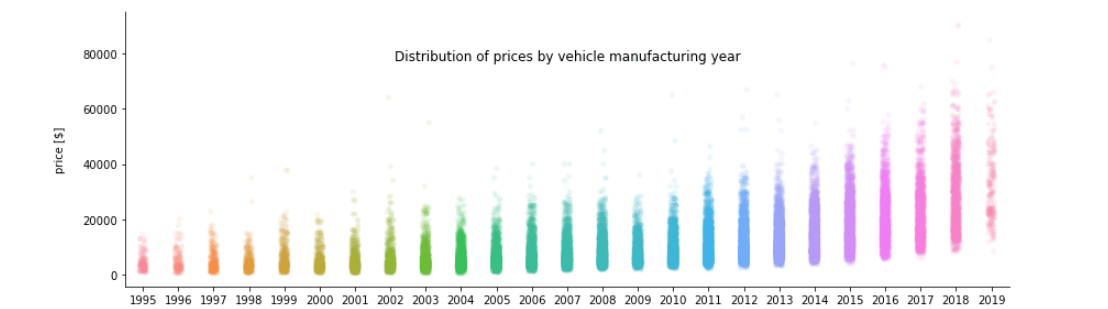

[Back to Content](#content)